# Problem Statement

 Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

# `CRISP-ML(Q)` process model describes six phases:
 
 1. Business and Data Understanding
 2. Data Preparation
 3. Model Building
 4. Evaluation
 5. Deployment
 6. Monitoring and Maintenance


# Objective(s): : Minimize Unexpected Credit Default
# Constraints: Minimize Expenses


# Success Criteria

Business Success Criteria: Reduce the Unexpected credit default by at least 30%.

Machine Learning Success Criteria: Build a machine learning model with 95% accuracy
                                   in predicting potential credit default.
                                   
Economic Success Criteria: Achieve a cost saving of total $2M per year due to the reduction 
                          of credit default
                          
# Data Collection

 credit card owner's characteristics and payment history are obtained from Kaggle.

# Data Dictionary: 
- Dataset contains 30000 Observations
- 25 features are recorded for each credit card owner


In [1]:
import os
os.chdir(r"G:\iNeuron.ai\Project")

In [2]:
import numpy as np
import pandas as pd

import dtale
import sweetviz

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as skmet
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from lazypredict.Supervised import LazyClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model, svm, neighbors, naive_bayes, ensemble
import sklearn.model_selection
from tpot import TPOTClassifier
from flaml import AutoML


from sklearn.pipeline import Pipeline
import pickle, joblib

from sqlalchemy import create_engine

# Dataset

In [3]:
df = pd.read_csv(r"G:\iNeuron.ai\Project\Dataset\UCI_Credit_Card.csv")
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1   20000.00    2          2         1   24      2      2     -1   
1          2  120000.00    2          2         2   26     -1      2      0   
2          3   90000.00    2          2         2   34      0      0      0   
3          4   50000.00    2          2         1   37      0      0      0   
4          5   50000.00    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996  220000.00    1          3         1   39      0      0      0   
29996  29997  150000.00    1          3         2   43     -1     -1     -1   
29997  29998   30000.00    1          2         2   37      4      3      2   
29998  29999   80000.00    1          3         1   41      1     -1      0   
29999  30000   50000.00    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...       0.00       0.00       0.00      0.00    689.00   
1          0  ...    3272.00    3455.00    3261.00      0.00   1000.00   
2          0  ...   14331.00   14948.00   15549.00   1518.00   1500.00   
3          0  ...   28314.00   28959.00   29547.00   2000.00   2019.00   
4          0  ...   20940.00   19146.00   19131.00   2000.00  36681.00   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...   88004.00   31237.00   15980.00   8500.00  20000.00   
29996     -1  ...    8979.00    5190.00       0.00   1837.00   3526.00   
29997     -1  ...   20878.00   20582.00   19357.00      0.00      0.00   
29998      0  ...   52774.00   11855.00   48944.00  85900.00   3409.00   
29999      0  ...   36535.00   32428.00   15313.00   2078.00   1800.00   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0          0.00      0.00      0.00      0.00                           1  
1       1000.00   1000.00      0.00   2000.00                           1  
2       1000.00   1000.00   1000.00   5000.00                           0  
3       1200.00   1100.00   1069.00   1000.00                           0  
4      10000.00   9000.00    689.00    679.00                           0  
...         ...       ...       ...       ...                         ...  
29995   5003.00   3047.00   5000.00   1000.00                           0  
29996   8998.00    129.00      0.00      0.00                           0  
29997  22000.00   4200.00   2000.00   3100.00                           1  
29998   1178.00   1926.00  52964.00   1804.00                           1  
29999   1430.00   1000.00   1000.00   1000.00                           1  

[30000 rows x 25 columns]

# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe()

ID  LIMIT_BAL      SEX  EDUCATION  MARRIAGE      AGE    PAY_0  \
count 30000.00   30000.00 30000.00   30000.00  30000.00 30000.00 30000.00   
mean  15000.50  167484.32     1.60       1.85      1.55    35.49    -0.02   
std    8660.40  129747.66     0.49       0.79      0.52     9.22     1.12   
min       1.00   10000.00     1.00       0.00      0.00    21.00    -2.00   
25%    7500.75   50000.00     1.00       1.00      1.00    28.00    -1.00   
50%   15000.50  140000.00     2.00       2.00      2.00    34.00     0.00   
75%   22500.25  240000.00     2.00       2.00      2.00    41.00     0.00   
max   30000.00 1000000.00     2.00       6.00      3.00    79.00     8.00   

         PAY_2    PAY_3    PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
count 30000.00 30000.00 30000.00  ...   30000.00   30000.00   30000.00   
mean     -0.13    -0.17    -0.22  ...   43262.95   40311.40   38871.76   
std       1.20     1.20     1.17  ...   64332.86   60797.16   59554.11   
min      -2.00    -2.00    -2.00  ... -170000.00  -81334.00 -339603.00   
25%      -1.00    -1.00    -1.00  ...    2326.75    1763.00    1256.00   
50%       0.00     0.00     0.00  ...   19052.00   18104.50   17071.00   
75%       0.00     0.00     0.00  ...   54506.00   50190.50   49198.25   
max       8.00     8.00     8.00  ...  891586.00  927171.00  961664.00   

       PAY_AMT1   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
count  30000.00   30000.00  30000.00  30000.00  30000.00  30000.00   
mean    5663.58    5921.16   5225.68   4826.08   4799.39   5215.50   
std    16563.28   23040.87  17606.96  15666.16  15278.31  17777.47   
min        0.00       0.00      0.00      0.00      0.00      0.00   
25%     1000.00     833.00    390.00    296.00    252.50    117.75   
50%     2100.00    2009.00   1800.00   1500.00   1500.00   1500.00   
75%     5006.00    5000.00   4505.00   4013.25   4031.50   4000.00   
max   873552.00 1684259.00 896040.00 621000.00 426529.00 528666.00   

       default.payment.next.month  
count                    30000.00  
mean                         0.22  
std                          0.42  
min                          0.00  
25%                          0.00  
50%                          0.00  
75%                          0.00  
max                          1.00  

[8 rows x 25 columns]

# Check is there are any Missing values

In [7]:
df.isnull().sum()

Engine_rpm           0
Lub_oil_pressure     0
Fuel_pressure        0
Coolant_pressure     0
lub_oil_temp         0
Coolant_temp         0
Vehicle_condition    0
dtype: int64

# Check is there are any Duplicates entry

In [8]:
df.duplicated().sum()

0

# Higher Likelihood In Target Column

In [9]:
df.Vehicle_condition.value_counts()

Vehicle_condition
1    12317
0     7218
Name: count, dtype: int64

#    Exploratory Data Analysis ( 1ST Moment Business Decision )
 
# Measure Of Central Tendency 

# MEAN Calculation
 

In [10]:
# Calculate the mean for all variables
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    # Calculate the mean for the column
    column_mean = column_data.mean()
    print(f"Mean for {column}: {column_mean}")


Mean for Engine_rpm: 791.2392628615306
Mean for Lub_oil_pressure: 3.303775135939595
Mean for Fuel_pressure: 6.655615478808804
Mean for Coolant_pressure: 2.3353688587970307
Mean for lub_oil_temp: 77.64342020476069
Mean for Coolant_temp: 78.4274329818275
Mean for Vehicle_condition: 0.6305093422062964


# MEDIAN Calculation

In [11]:
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    
    # Calculate the median for the column
    column_median = column_data.median()
    
    # Print the median for the column
    print(f"Median for {column}: {column_median}")

Median for Engine_rpm: 746.0
Median for Lub_oil_pressure: 3.16203
Median for Fuel_pressure: 6.20172
Median for Coolant_pressure: 2.16688
Median for lub_oil_temp: 76.8174
Median for Coolant_temp: 78.3467
Median for Vehicle_condition: 1.0


# MODE Calculation

In [12]:
for column in df:
    # Get the column data
    column_data = df[column]
    
    # Calculate the mode for the column
    column_mode = column_data.mode().values[0]  # Retrieve the first mode if multiple modes exist
    
    # Print the mode for the column
    print(f"Mode for {column}: {column_mode}")

Mode for Engine_rpm: 620
Mode for Lub_oil_pressure: 1.86891
Mode for Fuel_pressure: 5.76471
Mode for Coolant_pressure: 1.60782
Mode for lub_oil_temp: 75.4021
Mode for Coolant_temp: 70.774
Mode for Vehicle_condition: 1


# Second Moment Business Decision

# "  Measures of Dispersion "

# Variance Calculation


In [13]:
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    
    # Calculate the variance for the column
    column_variance = column_data.var()
    
    # Print the variance for the column
    print(f"Variance for {column}: {column_variance}")

Variance for Engine_rpm: 71615.75067499676
Variance for Lub_oil_pressure: 1.0437544393971416
Variance for Fuel_pressure: 7.62323602525819
Variance for Coolant_pressure: 1.0740878757638062
Variance for lub_oil_temp: 9.678221975430251
Variance for Coolant_temp: 38.52373403133702
Variance for Vehicle_condition: 0.23297923784402028


# Standard Deviation Calculation

In [14]:
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    
    # Calculate the standard deviation for the column
    column_std = column_data.std()
    
    # Print the standard deviation for the column
    print(f"Standard deviation for {column}: {column_std}")

Standard deviation for Engine_rpm: 267.6111931048415
Standard deviation for Lub_oil_pressure: 1.0216430097627751
Standard deviation for Fuel_pressure: 2.761020830283283
Standard deviation for Coolant_pressure: 1.036382108955865
Standard deviation for lub_oil_temp: 3.110984084727894
Standard deviation for Coolant_temp: 6.206749071078757
Standard deviation for Vehicle_condition: 0.48267922872651176


# Range Calculation

In [15]:
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    
    # Calculate the range for the column
    column_range = column_data.max() - column_data.min()
    
    # Print the range for the column
    print(f"Range for {column}: {column_range}")


Range for Engine_rpm: 2178
Range for Lub_oil_pressure: 7.2621858900000005
Range for Fuel_pressure: 21.13511287
Range for Coolant_pressure: 7.47602727
Range for lub_oil_temp: 18.258799999999994
Range for Coolant_temp: 133.85469999999998
Range for Vehicle_condition: 1


# Third Moment Business Decision

# Skewness Calculations


In [16]:
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    
    # Calculate the skewness for the column
    column_skewness = column_data.skew()
    
    # Print the skewness for the column
    print(f"Skewness for {column}: {column_skewness}")

Skewness for Engine_rpm: 0.9349318878848264
Skewness for Lub_oil_pressure: 0.19578359029819797
Skewness for Fuel_pressure: 1.2163869396010871
Skewness for Coolant_pressure: 1.3094204837097787
Skewness for lub_oil_temp: 1.4963746688183817
Skewness for Coolant_temp: 0.4044520098738061
Skewness for Vehicle_condition: -0.5408258627991327


# Forth Moment Business Decision

# Kurtosis Calculations

In [17]:
for column in df.select_dtypes(include=np.number):
    # Get the column data
    column_data = df[column]
    
    # Calculate the kurtosis for the column
    column_kurtosis = column_data.kurtosis()
    
    # Print the kurtosis for the column
    print(f"Kurtosis for {column}: {column_kurtosis}")

Kurtosis for Engine_rpm: 0.9369214351656776
Kurtosis for Lub_oil_pressure: -0.26015209354726476
Kurtosis for Fuel_pressure: 2.452667404548088
Kurtosis for Coolant_pressure: 2.5560447675000346
Kurtosis for lub_oil_temp: 1.749363372736465
Kurtosis for Coolant_temp: 5.8805701063847025
Kurtosis for Vehicle_condition: -1.707682229703129


# Histograms for Univariate Analysis

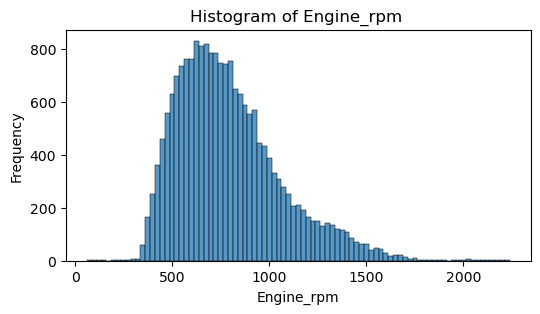

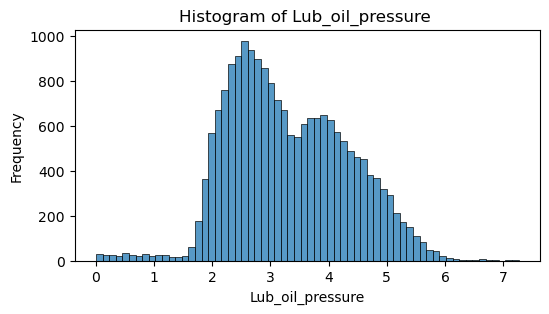

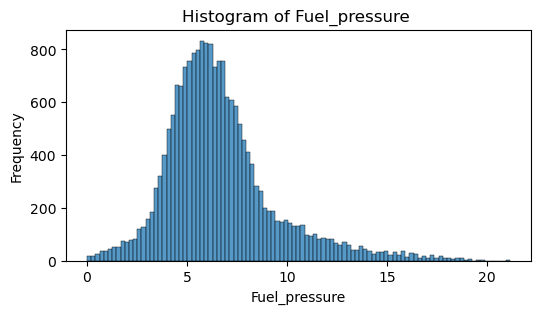

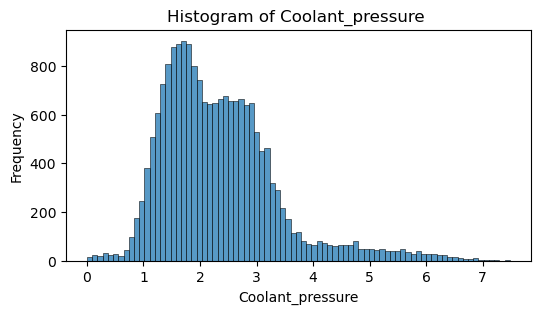

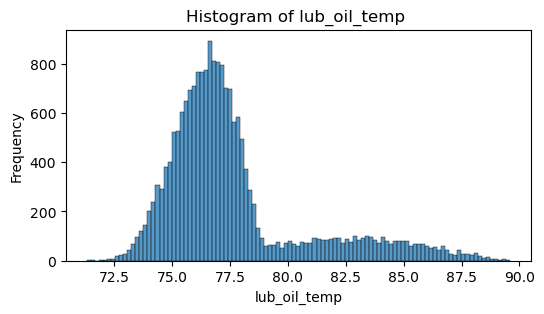

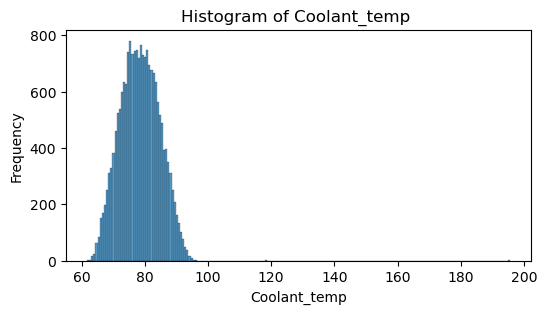

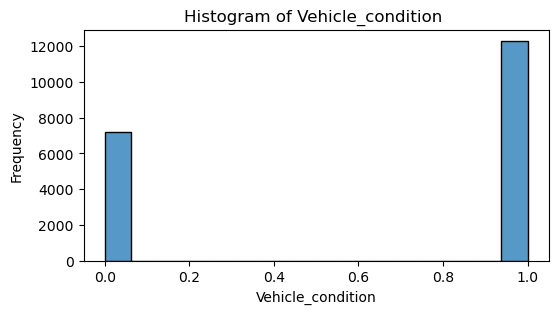

In [18]:
for column in df.columns:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=df[column], kde=False)
    plt.title(f'Histogram of {column} ')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot for Univariate Analysis

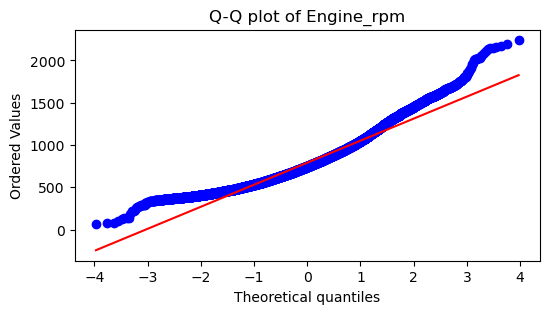

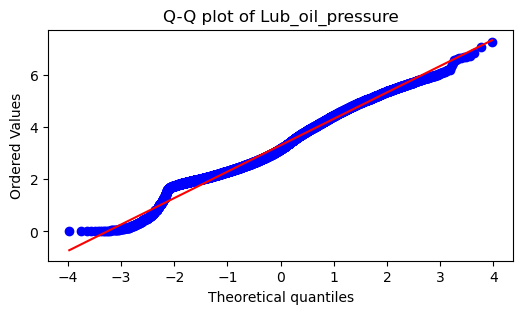

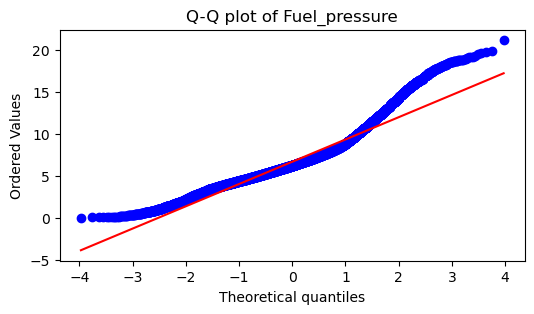

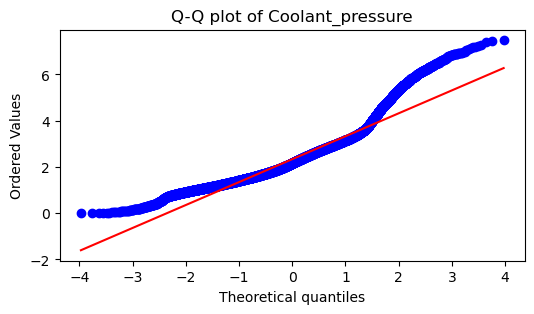

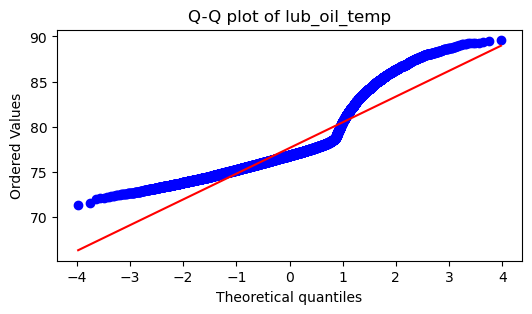

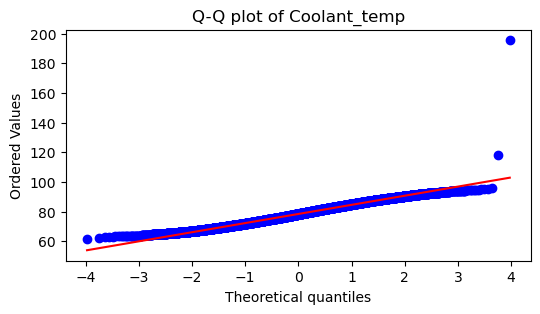

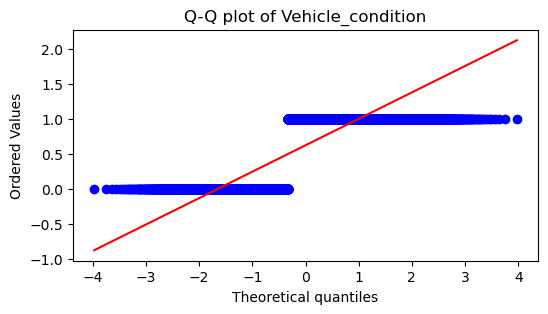

In [19]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 3))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

 # Let's see Q-Q Plot after yeo_johnson Transformation

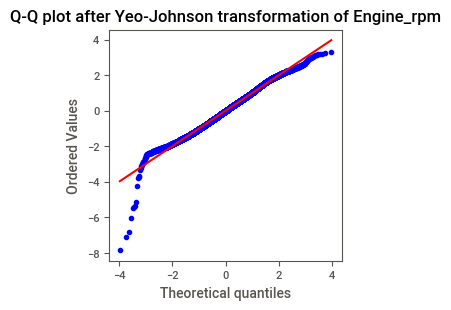

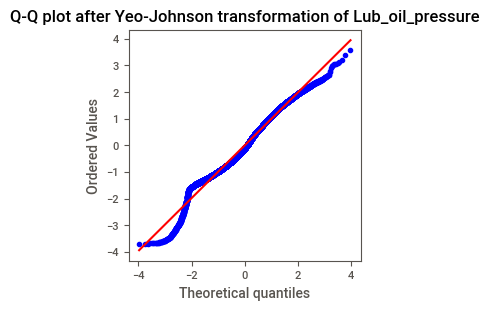

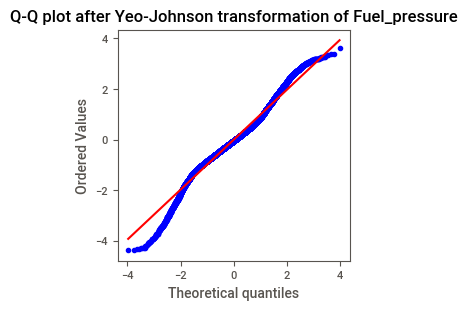

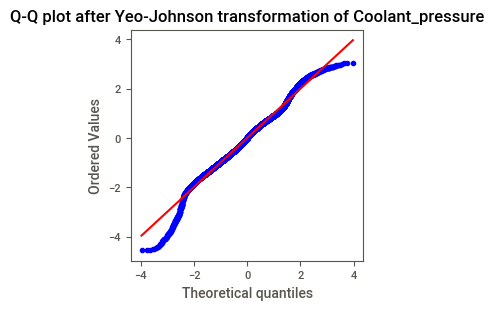

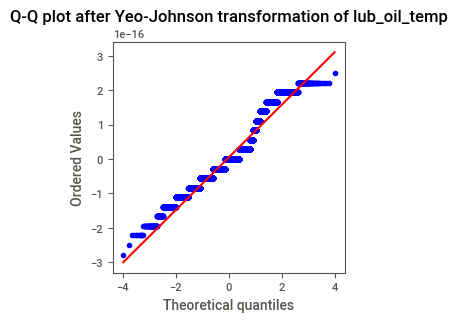

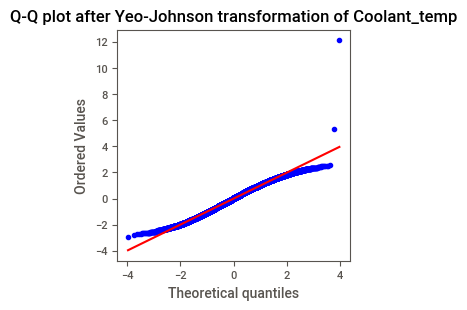

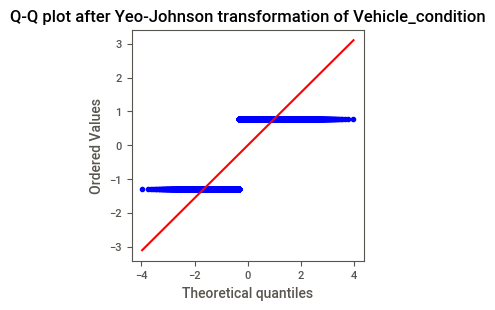

In [492]:
for column in df.select_dtypes(include=np.number).columns:
    yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
    transformed_data = yeo_johnson_transformer.fit_transform(df[[column]])
    plt.figure(figsize=(3, 3))
    stats.probplot(transformed_data.flatten(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot after Yeo-Johnson transformation of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

# "Except Coolant_temp, No columns in this dataset appear to be normally distributed."

# Let's see Q-Q Plot after BOXCOX Transformation

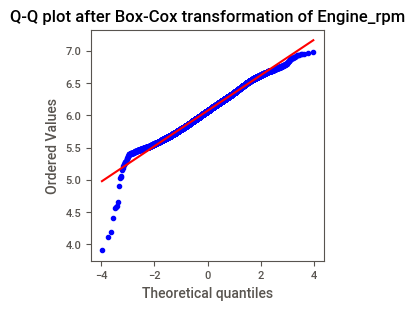

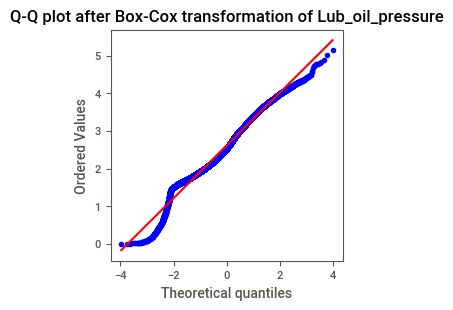

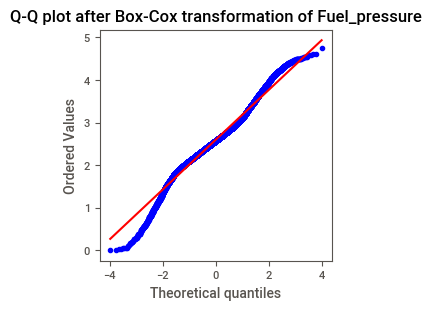

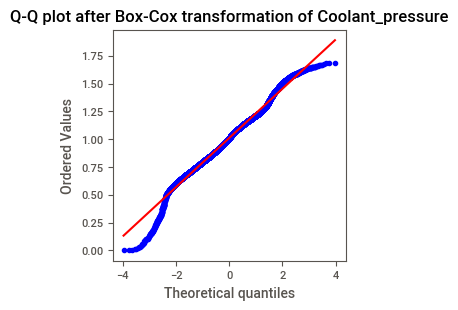

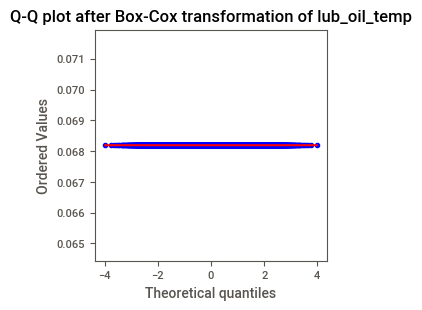

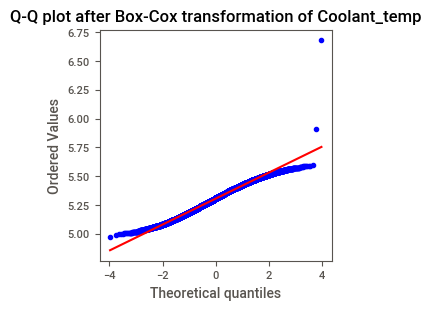

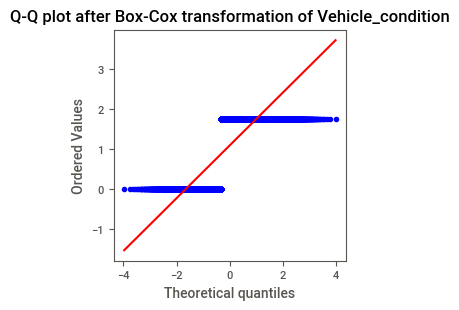

In [493]:
for column in df.select_dtypes(include=np.number).columns:
    # Apply Box-Cox transformation to the data
    transformed_data, _ = stats.boxcox(df[column] + 1)  # Adding 1 to avoid zero values
    
    # Plot Q-Q plot
    plt.figure(figsize=(3, 3))
    stats.probplot(transformed_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot after Box-Cox transformation of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

# "Now columns in this dataset appear near to be normally distributed."

# Boxplot for Univariate Analysis to see Outliers

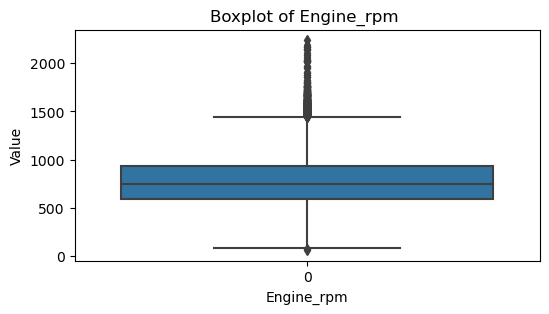

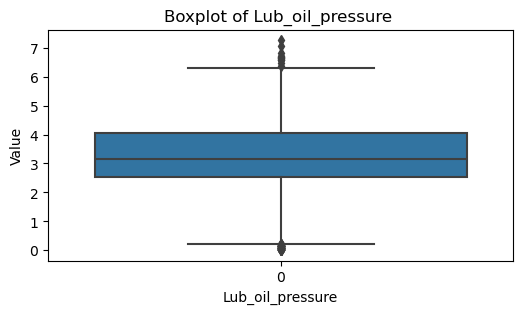

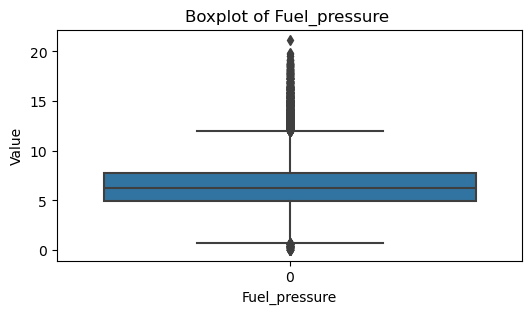

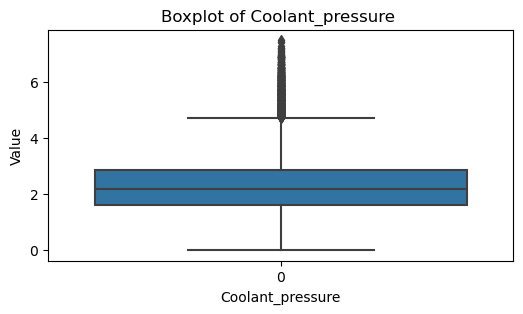

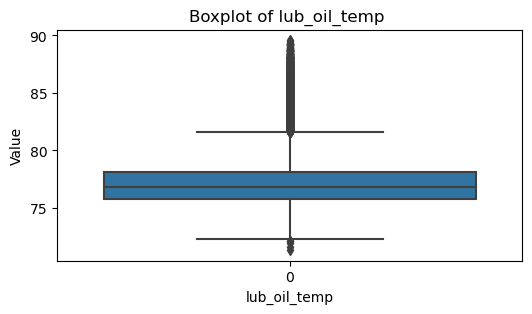

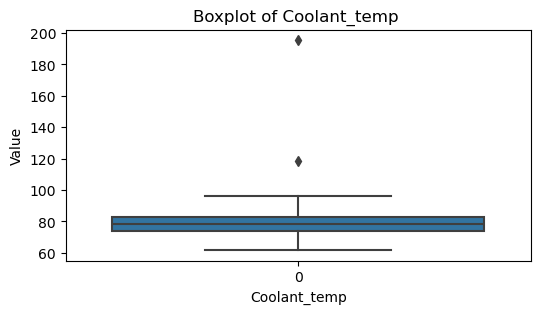

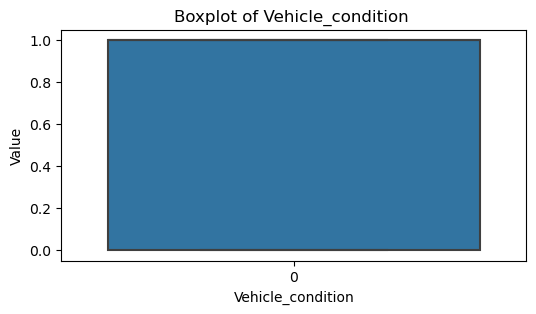

In [22]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column} ')
    plt.ylabel('Value')
    plt.xlabel(column)
    plt.show()

# Every Continuous Columns have Outliers

# Scatterplot ( Bivariate Analysis ) For Continuous Input Variables

In [23]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
continuous_columns

Index(['Engine_rpm', 'Lub_oil_pressure', 'Fuel_pressure', 'Coolant_pressure',
       'lub_oil_temp', 'Coolant_temp', 'Vehicle_condition'],
      dtype='object')

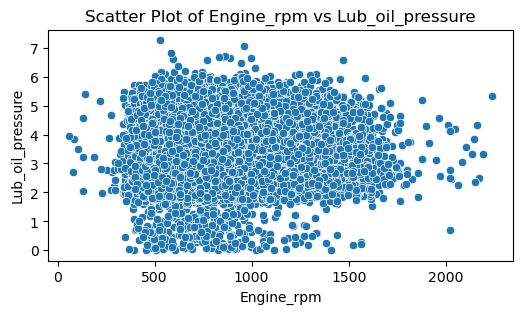

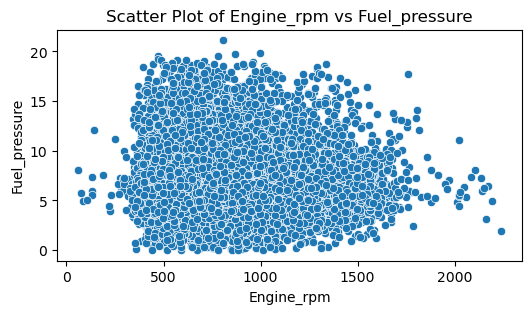

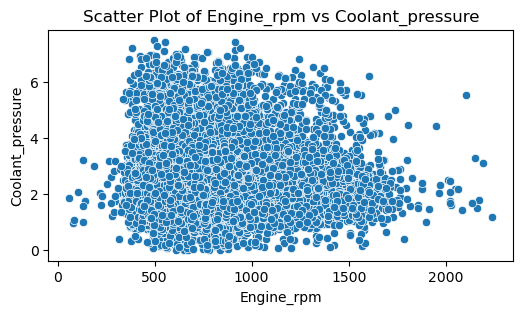

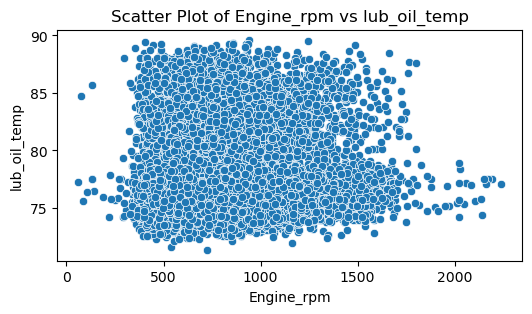

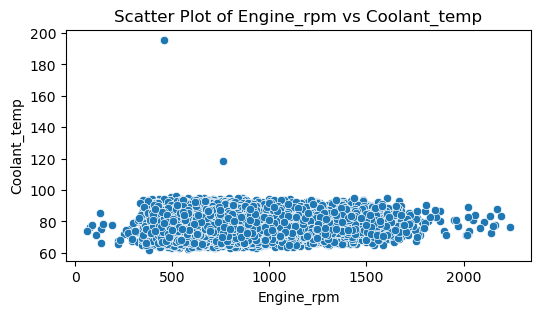

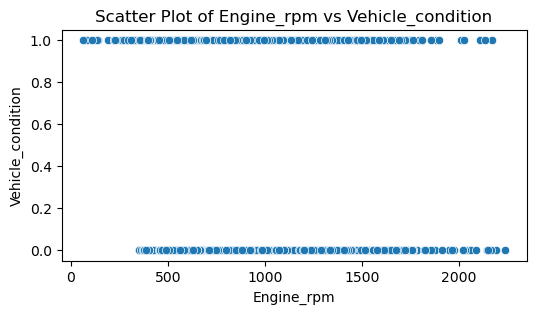

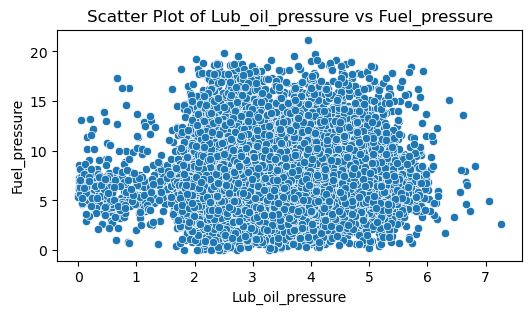

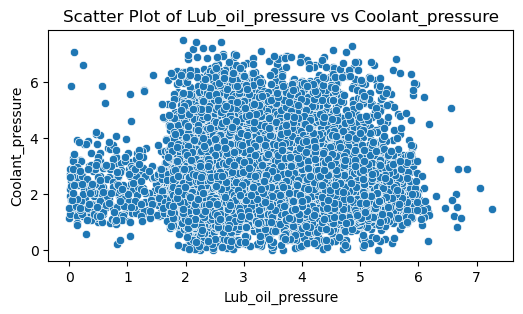

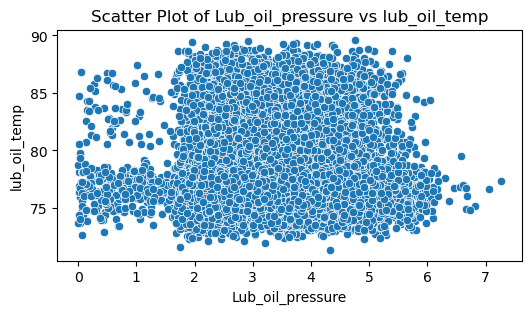

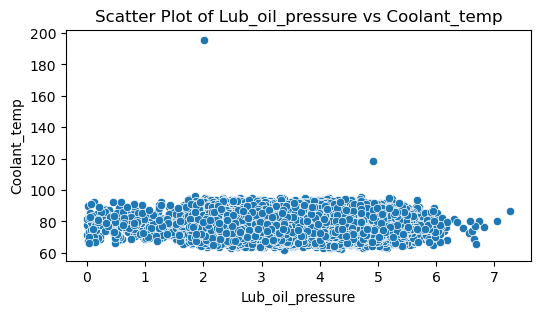

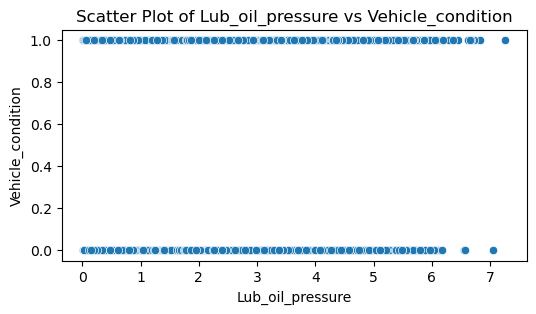

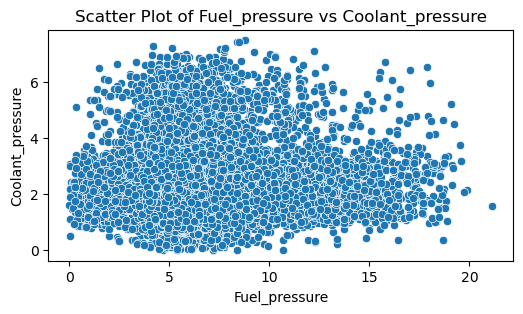

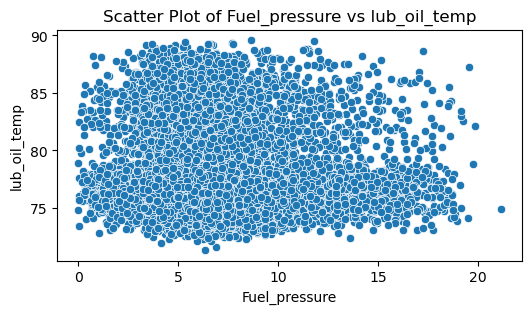

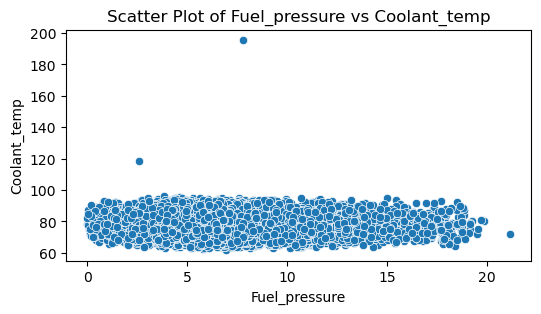

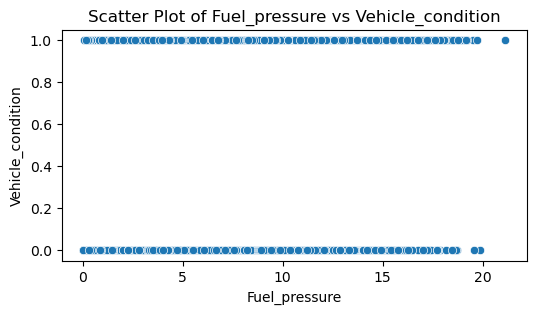

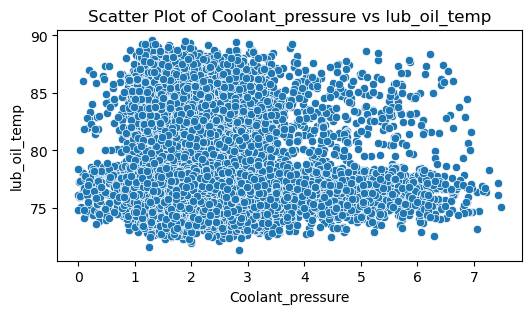

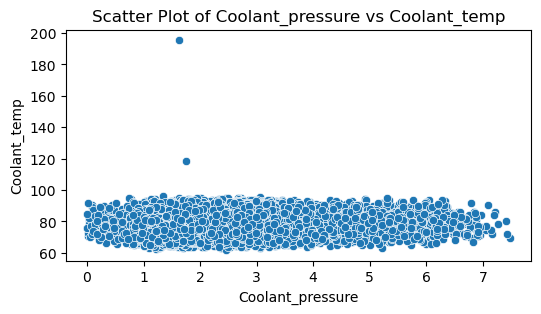

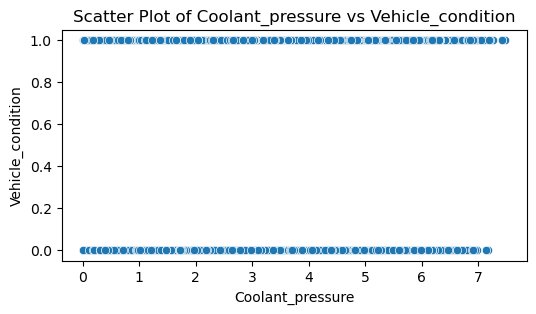

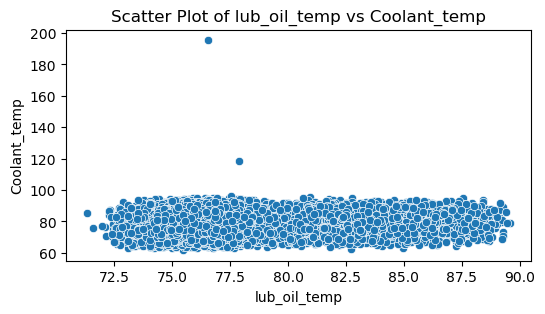

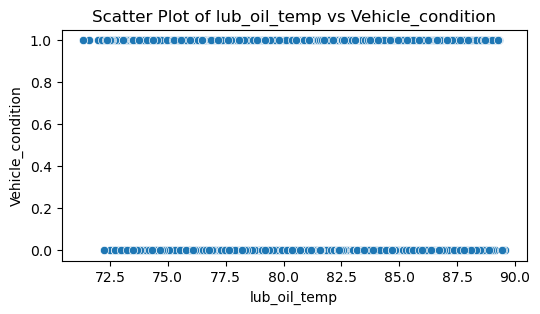

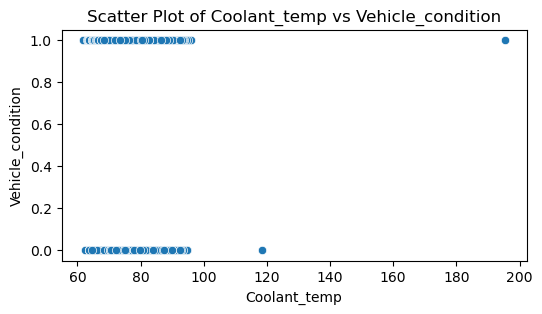

In [24]:
for i in range(len(continuous_columns)):
    for j in range(i+1, len(continuous_columns)):
        plt.figure(figsize=(6,3))
        sns.scatterplot(data=df, x=continuous_columns[i], y=continuous_columns[j])
        plt.title(f'Scatter Plot of {continuous_columns[i]} vs {continuous_columns[j]}')
        plt.xlabel(continuous_columns[i])
        plt.ylabel(continuous_columns[j])
        plt.show()

# Relationship between Input Variables are not Linear. 

# Let's See the Correlation Value Between each Input Variables

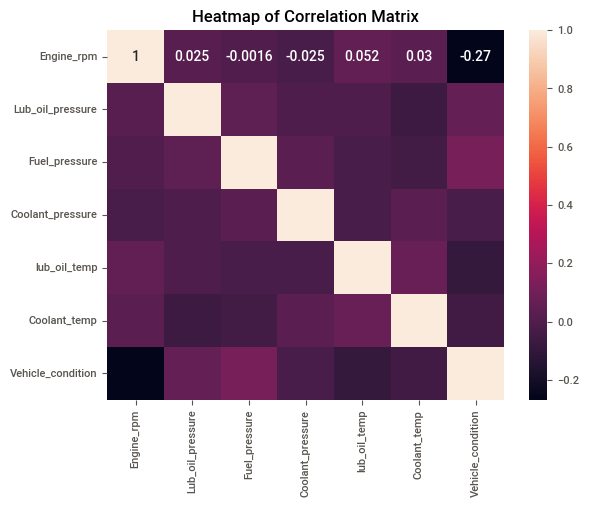

In [458]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True)

# Add title
plt.title("Heatmap of Correlation Matrix")

# Show plot
plt.show()

In [444]:
df

Engine_rpm  Lub_oil_pressure  Fuel_pressure  Coolant_pressure  \
0             700              2.49          11.79              3.18   
1             876              2.94          16.19              2.46   
2             520              2.96           6.55              1.06   
3             473              3.71          19.51              3.73   
4             619              5.67          15.74              2.05   
...           ...               ...            ...               ...   
19530         902              4.12           4.98              4.35   
19531         694              4.82          10.87              6.19   
19532         684              2.67           4.93              1.90   
19533         696              3.09           8.29              1.22   
19534         504              3.78           3.96              2.04   

       lub_oil_temp  Coolant_temp  Vehicle_condition  
0             84.14         81.63                  1  
1             77.64         82.45                  0  
2             77.75         79.65                  1  
3             74.13         71.77                  1  
4             78.40         87.00                  0  
...             ...           ...                ...  
19530         75.95         87.93                  1  
19531         75.28         74.93                  1  
19532         76.84         86.34                  1  
19533         77.18         73.62                  1  
19534         75.56         80.42                  1  

[19535 rows x 7 columns]

# Let's See Correlation between Inputs and Output Features

# Create a Copy of Dataset
# Encode Target Variable using LabelEncoder

In [26]:
import copy
df_copy = copy.deepcopy(df)
df_copy

Engine_rpm  Lub_oil_pressure  Fuel_pressure  Coolant_pressure  \
0             700              2.49          11.79              3.18   
1             876              2.94          16.19              2.46   
2             520              2.96           6.55              1.06   
3             473              3.71          19.51              3.73   
4             619              5.67          15.74              2.05   
...           ...               ...            ...               ...   
19530         902              4.12           4.98              4.35   
19531         694              4.82          10.87              6.19   
19532         684              2.67           4.93              1.90   
19533         696              3.09           8.29              1.22   
19534         504              3.78           3.96              2.04   

       lub_oil_temp  Coolant_temp  Vehicle_condition  
0             84.14         81.63                  1  
1             77.64         82.45                  0  
2             77.75         79.65                  1  
3             74.13         71.77                  1  
4             78.40         87.00                  0  
...             ...           ...                ...  
19530         75.95         87.93                  1  
19531         75.28         74.93                  1  
19532         76.84         86.34                  1  
19533         77.18         73.62                  1  
19534         75.56         80.42                  1  

[19535 rows x 7 columns]

In [27]:
label_encoder = LabelEncoder()
df_copy["Vehicle_condition"] = label_encoder.fit_transform(df_copy["Vehicle_condition"])
df_copy

Engine_rpm  Lub_oil_pressure  Fuel_pressure  Coolant_pressure  \
0             700              2.49          11.79              3.18   
1             876              2.94          16.19              2.46   
2             520              2.96           6.55              1.06   
3             473              3.71          19.51              3.73   
4             619              5.67          15.74              2.05   
...           ...               ...            ...               ...   
19530         902              4.12           4.98              4.35   
19531         694              4.82          10.87              6.19   
19532         684              2.67           4.93              1.90   
19533         696              3.09           8.29              1.22   
19534         504              3.78           3.96              2.04   

       lub_oil_temp  Coolant_temp  Vehicle_condition  
0             84.14         81.63                  1  
1             77.64         82.45                  0  
2             77.75         79.65                  1  
3             74.13         71.77                  1  
4             78.40         87.00                  0  
...             ...           ...                ...  
19530         75.95         87.93                  1  
19531         75.28         74.93                  1  
19532         76.84         86.34                  1  
19533         77.18         73.62                  1  
19534         75.56         80.42                  1  

[19535 rows x 7 columns]

# Pair plot For ( Multivariate Analysis )

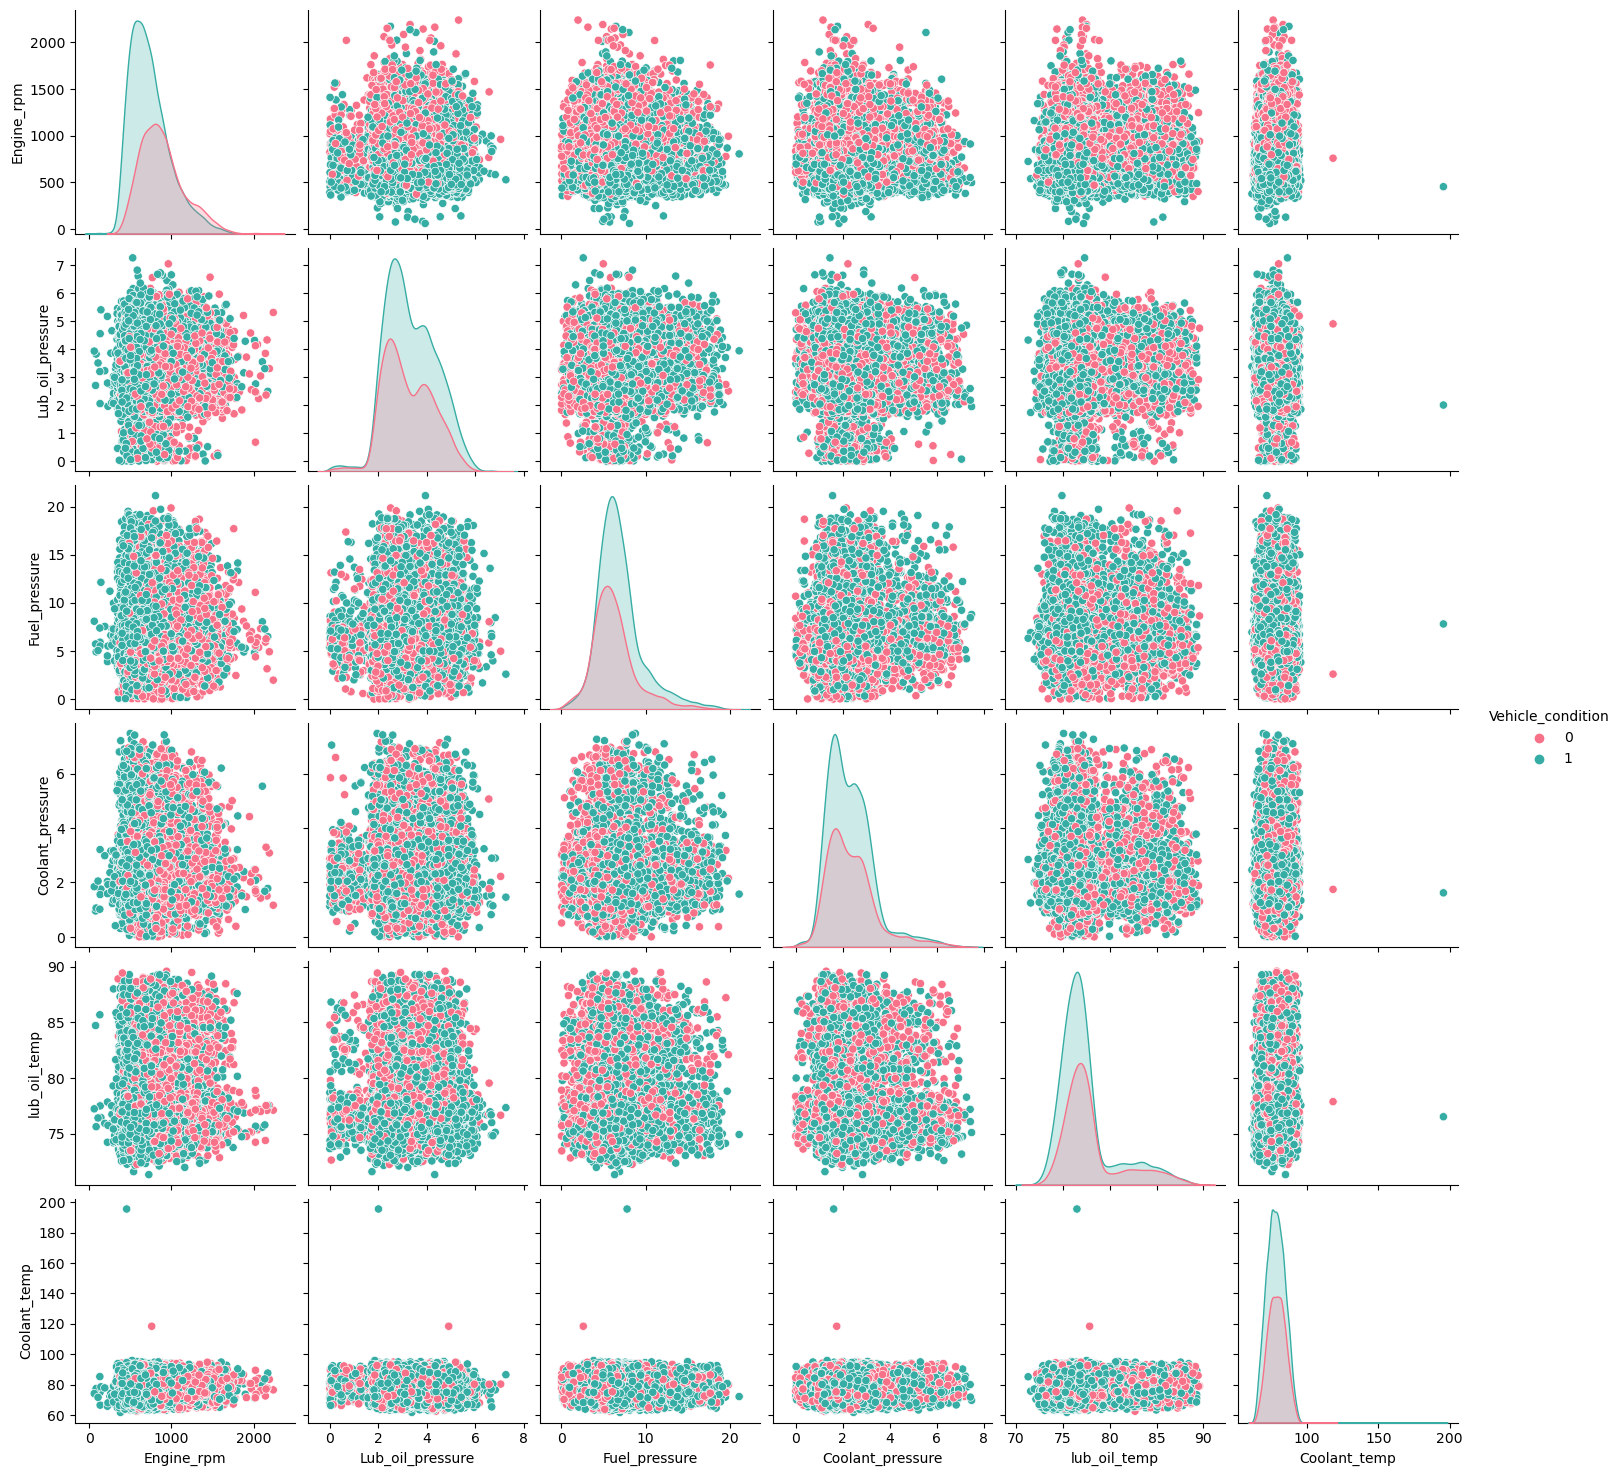

In [28]:
sns.pairplot(df_copy, hue='Vehicle_condition', diag_kind='kde',palette='husl')
plt.show()

# Correlation values for Input Variables with respect to Target Variable

In [29]:
correlation_with_output = df_copy.corrwith(df_copy["Vehicle_condition"], axis=0)
correlation_with_output

Engine_rpm          -0.27
Lub_oil_pressure     0.06
Fuel_pressure        0.12
Coolant_pressure    -0.02
lub_oil_temp        -0.09
Coolant_temp        -0.05
Vehicle_condition    1.00
dtype: float64

#  Calculate Spearman's Rank Correlation Coefficient

In [30]:
for input_var in df.select_dtypes(include=np.number).columns:
    spearman_corr, spearman_p_value = spearmanr(df[input_var], df["Vehicle_condition"])
    print(f"'{input_var}' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : {spearman_corr:.4f} And (p-value: {spearman_p_value:.4f})")

'Engine_rpm' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : -0.2833 And (p-value: 0.0000)
'Lub_oil_pressure' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : 0.0629 And (p-value: 0.0000)
'Fuel_pressure' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : 0.1336 And (p-value: 0.0000)
'Coolant_pressure' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : -0.0125 And (p-value: 0.0802)
'lub_oil_temp' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : -0.1155 And (p-value: 0.0000)
'Coolant_temp' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : -0.0464 And (p-value: 0.0000)
'Vehicle_condition' with 'Vehicle_condition': Spearman's Rank Correlation Coefficient : 1.0000 And (p-value: 0.0000)


# Explore Analysis Using AutoEDA

In [31]:
d = dtale.show(df)
d.open_browser()

In [32]:
s = sweetviz.analyze(df)
s.show_html("df.html")

                                             |                                             | [  0%]   00:00 ->…

Report df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# End of Exploratory Data Analysis



# Let's Start DataPreprocessing 

In [8]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1   20000.00    2          2         1   24      2      2     -1   
1          2  120000.00    2          2         2   26     -1      2      0   
2          3   90000.00    2          2         2   34      0      0      0   
3          4   50000.00    2          2         1   37      0      0      0   
4          5   50000.00    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996  220000.00    1          3         1   39      0      0      0   
29996  29997  150000.00    1          3         2   43     -1     -1     -1   
29997  29998   30000.00    1          2         2   37      4      3      2   
29998  29999   80000.00    1          3         1   41      1     -1      0   
29999  30000   50000.00    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...       0.00       0.00       0.00      0.00    689.00   
1          0  ...    3272.00    3455.00    3261.00      0.00   1000.00   
2          0  ...   14331.00   14948.00   15549.00   1518.00   1500.00   
3          0  ...   28314.00   28959.00   29547.00   2000.00   2019.00   
4          0  ...   20940.00   19146.00   19131.00   2000.00  36681.00   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...   88004.00   31237.00   15980.00   8500.00  20000.00   
29996     -1  ...    8979.00    5190.00       0.00   1837.00   3526.00   
29997     -1  ...   20878.00   20582.00   19357.00      0.00      0.00   
29998      0  ...   52774.00   11855.00   48944.00  85900.00   3409.00   
29999      0  ...   36535.00   32428.00   15313.00   2078.00   1800.00   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0          0.00      0.00      0.00      0.00                           1  
1       1000.00   1000.00      0.00   2000.00                           1  
2       1000.00   1000.00   1000.00   5000.00                           0  
3       1200.00   1100.00   1069.00   1000.00                           0  
4      10000.00   9000.00    689.00    679.00                           0  
...         ...       ...       ...       ...                         ...  
29995   5003.00   3047.00   5000.00   1000.00                           0  
29996   8998.00    129.00      0.00      0.00                           0  
29997  22000.00   4200.00   2000.00   3100.00                           1  
29998   1178.00   1926.00  52964.00   1804.00                           1  
29999   1430.00   1000.00   1000.00   1000.00                           1  

[30000 rows x 25 columns]

# Segregating Input and Output Features

In [4]:
# Input Variables
 
predictors = df.iloc[:,1:24]
predictors

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0       20000.00    2          2         1   24      2      2     -1     -1   
1      120000.00    2          2         2   26     -1      2      0      0   
2       90000.00    2          2         2   34      0      0      0      0   
3       50000.00    2          2         1   37      0      0      0      0   
4       50000.00    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995  220000.00    1          3         1   39      0      0      0      0   
29996  150000.00    1          3         2   43     -1     -1     -1     -1   
29997   30000.00    1          2         2   37      4      3      2     -1   
29998   80000.00    1          3         1   41      1     -1      0      0   
29999   50000.00    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         -2  ...     689.00       0.00       0.00       0.00      0.00   
1          0  ...    2682.00    3272.00    3455.00    3261.00      0.00   
2          0  ...   13559.00   14331.00   14948.00   15549.00   1518.00   
3          0  ...   49291.00   28314.00   28959.00   29547.00   2000.00   
4          0  ...   35835.00   20940.00   19146.00   19131.00   2000.00   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...  208365.00   88004.00   31237.00   15980.00   8500.00   
29996      0  ...    3502.00    8979.00    5190.00       0.00   1837.00   
29997      0  ...    2758.00   20878.00   20582.00   19357.00      0.00   
29998      0  ...   76304.00   52774.00   11855.00   48944.00  85900.00   
29999      0  ...   49764.00   36535.00   32428.00   15313.00   2078.00   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0        689.00      0.00      0.00      0.00      0.00  
1       1000.00   1000.00   1000.00      0.00   2000.00  
2       1500.00   1000.00   1000.00   1000.00   5000.00  
3       2019.00   1200.00   1100.00   1069.00   1000.00  
4      36681.00  10000.00   9000.00    689.00    679.00  
...         ...       ...       ...       ...       ...  
29995  20000.00   5003.00   3047.00   5000.00   1000.00  
29996   3526.00   8998.00    129.00      0.00      0.00  
29997      0.00  22000.00   4200.00   2000.00   3100.00  
29998   3409.00   1178.00   1926.00  52964.00   1804.00  
29999   1800.00   1430.00   1000.00   1000.00   1000.00  

[30000 rows x 23 columns]

# Function To Apply Box-Cox transformation to each column

In [35]:
def apply_boxcox(column):
    # Add a small constant to avoid zero values
    constant = 1
    transformed_data, lambda_value = stats.boxcox(column + constant)
    return transformed_data

In [36]:
# Apply Box-Cox transformation to each column
predictors = predictor.apply(apply_boxcox)
predictors

Engine_rpm  Lub_oil_pressure  Fuel_pressure  Coolant_pressure  \
0            6.01              2.07           3.61              1.22   
1            6.20              2.39           4.20              1.08   
2            5.76              2.40           2.66              0.67   
3            5.68              2.92           4.58              1.31   
4            5.91              4.18           4.15              0.98   
...           ...               ...            ...               ...   
19530        6.23              3.19           2.28              1.39   
19531        6.01              3.64           3.47              1.59   
19532        5.99              2.20           2.26              0.95   
19533        6.01              2.49           3.02              0.73   
19534        5.74              2.96           1.99              0.98   

       lub_oil_temp  Coolant_temp  
0              0.07          5.37  
1              0.07          5.38  
2              0.07          5.33  
3              0.07          5.18  
4              0.07          5.46  
...             ...           ...  
19530          0.07          5.47  
19531          0.07          5.24  
19532          0.07          5.45  
19533          0.07          5.22  
19534          0.07          5.35  

[19535 rows x 6 columns]

In [5]:
# Output Variable

target = df.iloc[:,24:]
target

default.payment.next.month
0                               1
1                               1
2                               0
3                               0
4                               0
...                           ...
29995                           0
29996                           0
29997                           1
29998                           1
29999                           1

[30000 rows x 1 columns]

In [6]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

# Segregating Numerical and Catagorical Features

In [7]:
numeric_features = predictors.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [8]:
categorical_features = predictors.select_dtypes(include = ['object']).columns
categorical_features

Index([], dtype='object')

# Imputation Techniques to handle Missing Data ( Continuous Data)

In [9]:
# Mean imputation for ( Continuous) data
num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy = 'mean'))])

In [10]:
# 1st Imputation Transformer
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object'))])

In [11]:
# Fit the data to train imputation pipeline 

impute_data = preprocessor.fit(predictors)

In [12]:
# Save the pipeline

joblib.dump(impute_data, 'impute')

['impute']

In [13]:
# Transform to the Input data
x = pd.DataFrame(impute_data.transform(predictors), columns = numeric_features)

x.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

# " Outlier Treatment Using Winsorization and IQR Capping "

In [14]:
winsor = Winsorizer(capping_method = 'iqr', 
                    tail = 'both', 
                    fold = 1.5,
                    variables = list(x.columns))

In [15]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                       'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
                                       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']))])

In [16]:
preprocessor1 = ColumnTransformer(transformers = [('wins', 
                                                   outlier_pipeline,
                                                   numeric_features)], 
                                  remainder = 'passthrough')

In [17]:
# Fit the data 
winz_data = preprocessor1.fit(x)
winz_data

ColumnTransformer(remainder='passthrough',
                  transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['LIMIT_BAL',
                                                                        'SEX',
                                                                        'EDUCATION',
                                                                        'MARRIAGE',
                                                                        'AGE',
                                                                        'PAY_0',
                                                                        'PAY_2',
                                                                        'PAY_3',
                                                                        'PAY_4',
                                                                        'PAY_5',
                                                                        'PAY_6',
                                                                        'BILL_AMT1',
                                                                        'BILL_AMT2',
                                                                        'BILL_AMT3',
                                                                        'BILL_AMT4',
                                                                        'BILL_AMT5',
                                                                        'BILL_AMT6',
                                                                        'PAY_AMT1',
                                                                        'PAY_AMT2',
                                                                        'PAY_AMT3',
                                                                        'PAY_AMT4',
                                                                        'PAY_AMT5',
                                                                        'PAY_AMT6']))]),
                                 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object'))])

In [18]:
# Save the pipeline
joblib.dump(winz_data, 'winzor')

['winzor']

In [19]:
x1 = pd.DataFrame(winz_data.transform(x), columns = numeric_features )
x1

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0       20000.00 2.00       2.00      1.00 24.00   1.50   1.50  -1.00  -1.00   
1      120000.00 2.00       2.00      2.00 26.00  -1.00   1.50   0.00   0.00   
2       90000.00 2.00       2.00      2.00 34.00   0.00   0.00   0.00   0.00   
3       50000.00 2.00       2.00      1.00 37.00   0.00   0.00   0.00   0.00   
4       50000.00 1.00       2.00      1.00 57.00  -1.00   0.00  -1.00   0.00   
...          ...  ...        ...       ...   ...    ...    ...    ...    ...   
29995  220000.00 1.00       3.00      1.00 39.00   0.00   0.00   0.00   0.00   
29996  150000.00 1.00       3.00      2.00 43.00  -1.00  -1.00  -1.00  -1.00   
29997   30000.00 1.00       2.00      2.00 37.00   1.50   1.50   1.50  -1.00   
29998   80000.00 1.00       3.00      1.00 41.00   1.00  -1.00   0.00   0.00   
29999   50000.00 1.00       2.00      1.00 46.00   0.00   0.00   0.00   0.00   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0      -2.00  ...     689.00       0.00       0.00       0.00      0.00   
1       0.00  ...    2682.00    3272.00    3455.00    3261.00      0.00   
2       0.00  ...   13559.00   14331.00   14948.00   15549.00   1518.00   
3       0.00  ...   49291.00   28314.00   28959.00   29547.00   2000.00   
4       0.00  ...   35835.00   20940.00   19146.00   19131.00   2000.00   
...      ...  ...        ...        ...        ...        ...       ...   
29995   0.00  ...  146412.50   88004.00   31237.00   15980.00   8500.00   
29996   0.00  ...    3502.00    8979.00    5190.00       0.00   1837.00   
29997   0.00  ...    2758.00   20878.00   20582.00   19357.00      0.00   
29998   0.00  ...   76304.00   52774.00   11855.00   48944.00  11015.00   
29999   0.00  ...   49764.00   36535.00   32428.00   15313.00   2078.00   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0        689.00      0.00      0.00      0.00      0.00  
1       1000.00   1000.00   1000.00      0.00   2000.00  
2       1500.00   1000.00   1000.00   1000.00   5000.00  
3       2019.00   1200.00   1100.00   1069.00   1000.00  
4      11250.50  10000.00   9000.00    689.00    679.00  
...         ...       ...       ...       ...       ...  
29995  11250.50   5003.00   3047.00   5000.00   1000.00  
29996   3526.00   8998.00    129.00      0.00      0.00  
29997      0.00  10677.50   4200.00   2000.00   3100.00  
29998   3409.00   1178.00   1926.00   9700.00   1804.00  
29999   1800.00   1430.00   1000.00   1000.00   1000.00  

[30000 rows x 23 columns]

# Scaling with StandardScaler

In [20]:
scale_pipeline = Pipeline(steps=[('scale', StandardScaler())])

In [21]:
preprocessor2 = ColumnTransformer([('scale', scale_pipeline, numeric_features)])

In [22]:
scale = preprocessor2.fit(x1)

In [23]:
# Save Standard scaler pipeline model
joblib.dump(scale, 'standard')

['standard']

In [24]:
x2 = pd.DataFrame(scale.transform(x1), columns = numeric_features)
x2

LIMIT_BAL   SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          -1.15  0.81       0.23     -1.06 -1.26   1.67   1.75  -0.74  -0.72   
1          -0.37  0.81       0.23      0.86 -1.04  -0.95   1.75   0.26   0.31   
2          -0.60  0.81       0.23      0.86 -0.16   0.10   0.23   0.26   0.31   
3          -0.91  0.81       0.23     -1.06  0.17   0.10   0.23   0.26   0.31   
4          -0.91 -1.23       0.23     -1.06  2.37  -0.95   0.23  -0.74   0.31   
...          ...   ...        ...       ...   ...    ...    ...    ...    ...   
29995       0.41 -1.23       1.61     -1.06  0.39   0.10   0.23   0.26   0.31   
29996      -0.13 -1.23       1.61      0.86  0.83  -0.95  -0.77  -0.74  -0.72   
29997      -1.07 -1.23       0.23      0.86  0.17   1.67   1.75   1.77  -0.72   
29998      -0.68 -1.23       1.61     -1.06  0.61   1.15  -0.77   0.26   0.31   
29999      -0.91 -1.23       0.23     -1.06  1.16   0.10   0.23   0.26   0.31   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0      -1.75  ...      -0.84      -0.85      -0.85      -0.83     -1.00   
1       0.36  ...      -0.80      -0.78      -0.76      -0.75     -1.00   
2       0.36  ...      -0.57      -0.52      -0.47      -0.43     -0.57   
3       0.36  ...       0.20      -0.19      -0.12      -0.08     -0.43   
4       0.36  ...      -0.09      -0.37      -0.37      -0.34     -0.43   
...      ...  ...        ...        ...        ...        ...       ...   
29995   0.36  ...       2.28       1.20      -0.06      -0.42      1.43   
29996   0.36  ...      -0.78      -0.64      -0.72      -0.83     -0.48   
29997   0.36  ...      -0.80      -0.37      -0.33      -0.34     -1.00   
29998   0.36  ...       0.77       0.38      -0.55       0.42      2.15   
29999   0.36  ...       0.21      -0.00      -0.03      -0.44     -0.41   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         -0.77     -0.90     -0.88     -0.88     -0.87  
1         -0.69     -0.61     -0.56     -0.88     -0.23  
2         -0.54     -0.61     -0.56     -0.56      0.73  
3         -0.40     -0.55     -0.53     -0.54     -0.55  
4          2.22      2.08      2.04     -0.66     -0.65  
...         ...       ...       ...       ...       ...  
29995      2.22      0.59      0.11      0.73     -0.55  
29996      0.03      1.78     -0.84     -0.88     -0.87  
29997     -0.97      2.28      0.48     -0.24      0.12  
29998     -0.00     -0.55     -0.26      2.25     -0.29  
29999     -0.46     -0.48     -0.56     -0.56     -0.55  

[30000 rows x 23 columns]

# Imputation Techniques to handle Missing Data ( Categorical Data)

In [25]:
cat_pipeline = Pipeline(steps=[('impute1', SimpleImputer(strategy = 'most_frequent'))])

In [26]:
preprocessor3 = ColumnTransformer(transformers = [('cat', cat_pipeline, categorical_features)])
preprocessor3

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('impute1',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index([], dtype='object'))])

In [27]:
impute_data1 = preprocessor3.fit(predictors)

In [28]:
# Save the pipeline
joblib.dump(impute_data1, 'impute_data1')

['impute_data1']

In [29]:
x3 = pd.DataFrame(impute_data1.transform(predictors), columns = categorical_features)

x3.isna().sum()

Series([], dtype: float64)

# Encoding
# Categorical Features

In [30]:
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [31]:
preprocessor4 = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

In [32]:
clean_data1 =  preprocessor4.fit(predictors)

In [33]:
# Save the encoding model
joblib.dump(clean_data1, 'encoding')

['encoding']

In [34]:
x4 = pd.DataFrame(clean_data1.transform(predictors))
x4.columns = clean_data1.get_feature_names_out(input_features = predictors.columns)

# Concatenated Data 

In [35]:
clean_data = pd.concat([x2, x4], axis = 1)  
clean_data

LIMIT_BAL   SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          -1.15  0.81       0.23     -1.06 -1.26   1.67   1.75  -0.74  -0.72   
1          -0.37  0.81       0.23      0.86 -1.04  -0.95   1.75   0.26   0.31   
2          -0.60  0.81       0.23      0.86 -0.16   0.10   0.23   0.26   0.31   
3          -0.91  0.81       0.23     -1.06  0.17   0.10   0.23   0.26   0.31   
4          -0.91 -1.23       0.23     -1.06  2.37  -0.95   0.23  -0.74   0.31   
...          ...   ...        ...       ...   ...    ...    ...    ...    ...   
29995       0.41 -1.23       1.61     -1.06  0.39   0.10   0.23   0.26   0.31   
29996      -0.13 -1.23       1.61      0.86  0.83  -0.95  -0.77  -0.74  -0.72   
29997      -1.07 -1.23       0.23      0.86  0.17   1.67   1.75   1.77  -0.72   
29998      -0.68 -1.23       1.61     -1.06  0.61   1.15  -0.77   0.26   0.31   
29999      -0.91 -1.23       0.23     -1.06  1.16   0.10   0.23   0.26   0.31   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0      -1.75  ...      -0.84      -0.85      -0.85      -0.83     -1.00   
1       0.36  ...      -0.80      -0.78      -0.76      -0.75     -1.00   
2       0.36  ...      -0.57      -0.52      -0.47      -0.43     -0.57   
3       0.36  ...       0.20      -0.19      -0.12      -0.08     -0.43   
4       0.36  ...      -0.09      -0.37      -0.37      -0.34     -0.43   
...      ...  ...        ...        ...        ...        ...       ...   
29995   0.36  ...       2.28       1.20      -0.06      -0.42      1.43   
29996   0.36  ...      -0.78      -0.64      -0.72      -0.83     -0.48   
29997   0.36  ...      -0.80      -0.37      -0.33      -0.34     -1.00   
29998   0.36  ...       0.77       0.38      -0.55       0.42      2.15   
29999   0.36  ...       0.21      -0.00      -0.03      -0.44     -0.41   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         -0.77     -0.90     -0.88     -0.88     -0.87  
1         -0.69     -0.61     -0.56     -0.88     -0.23  
2         -0.54     -0.61     -0.56     -0.56      0.73  
3         -0.40     -0.55     -0.53     -0.54     -0.55  
4          2.22      2.08      2.04     -0.66     -0.65  
...         ...       ...       ...       ...       ...  
29995      2.22      0.59      0.11      0.73     -0.55  
29996      0.03      1.78     -0.84     -0.88     -0.87  
29997     -0.97      2.28      0.48     -0.24      0.12  
29998     -0.00     -0.55     -0.26      2.25     -0.29  
29999     -0.46     -0.48     -0.56     -0.56     -0.55  

[30000 rows x 23 columns]

 # Perform PCA For Feature Selection

In [36]:
pca_pipeline =Pipeline([('pca', PCA(n_components=19))])

In [37]:
preprocessor5 = ColumnTransformer([('pca_pipeline', pca_pipeline, list(clean_data.columns))])

In [38]:
afterpca_data = preprocessor5.fit(clean_data)
afterpca_data

ColumnTransformer(transformers=[('pca_pipeline',
                                 Pipeline(steps=[('pca',
                                                  PCA(n_components=19))]),
                                 ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                                  'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

In [39]:
# Access the PCA object from the fitted pipeline
p_c_a = afterpca_data.named_transformers_["pca_pipeline"] ["pca"]

In [40]:
components = pd.DataFrame(p_c_a.components_).T

In [41]:
var1 = np.cumsum(p_c_a.explained_variance_ratio_)
var1

array([0.35770994, 0.54680452, 0.61394558, 0.66927189, 0.71385085,
       0.75242006, 0.78217414, 0.8087629 , 0.83358154, 0.85654838,
       0.8791985 , 0.90142906, 0.92313887, 0.94361995, 0.95986927,
       0.97044402, 0.97963086, 0.98605793, 0.99084205])

In [42]:
# Save the encoding model
joblib.dump(afterpca_data, 'pca')

['pca']

In [43]:
pca = pd.DataFrame(afterpca_data.transform(clean_data))
pca

0     1     2     3     4     5     6     7     8     9     10    11  \
0     -3.12 -1.25  0.26 -1.23 -0.95 -0.35  1.98 -1.32 -1.60  1.05 -0.63  0.75   
1     -1.60 -2.35 -1.31  0.69 -0.94  0.05 -0.36  0.76  0.34 -0.20  0.69 -0.52   
2     -1.09 -1.29 -0.67  0.28 -0.83  0.19  0.23  0.03  0.69 -0.31  0.48  0.02   
3     -0.36 -1.37  0.92 -0.35 -0.91 -0.45 -0.43  0.10 -0.60 -0.25 -0.08  0.19   
4      0.06  0.84  1.77  2.57  1.06  0.75 -1.32  1.75 -0.05  0.81 -1.83  1.75   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995  3.64  0.61  1.82 -0.57  0.80  1.39 -1.45 -1.66 -0.62  1.05  0.17  0.65   
29996 -2.03  0.15  0.57  0.74  0.81  1.98 -1.23  1.29  0.99  1.65 -0.43 -0.72   
29997 -0.23 -2.10 -0.58  1.47  1.08  0.79  2.00  0.63  0.18  1.46 -2.01 -0.94   
29998  0.98  0.12  1.62  0.67  0.65  1.61  0.25 -1.76 -0.90 -0.72 -0.19  0.03   
29999 -0.34 -1.39  1.68 -0.10  1.15 -0.01 -0.48  0.22 -0.37 -0.26 -0.21  0.20   

         12    13    14    15    16    17    18  
0      0.31 -0.07  0.55 -0.17 -0.78  0.81  0.66  
1      0.43 -0.25  1.06  1.25 -1.05  0.03  0.62  
2     -0.13 -0.94 -0.05  0.09  0.01 -0.01  0.01  
3     -0.15 -0.16  0.02  0.20  0.10 -0.05 -0.03  
4      0.70 -0.10  1.37 -0.08  0.29  0.32  0.18  
...     ...   ...   ...   ...   ...   ...   ...  
29995  0.32  0.77  0.25  1.60  0.91 -0.62 -0.25  
29996 -0.53  0.01  0.19  0.26 -0.01 -0.19 -0.01  
29997 -0.49 -0.66  1.07 -0.35 -0.45 -0.51 -0.57  
29998 -1.14  1.41 -2.12 -0.51  0.11  0.13 -0.45  
29999 -0.27 -0.33  0.02  0.20  0.19 -0.06 -0.05  

[30000 rows x 19 columns]

In [44]:
new_column_names = [f"PC{i}" for i in range(1, 20)]
pca.columns = new_column_names
pca

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0     -3.12 -1.25  0.26 -1.23 -0.95 -0.35  1.98 -1.32 -1.60  1.05 -0.63  0.75   
1     -1.60 -2.35 -1.31  0.69 -0.94  0.05 -0.36  0.76  0.34 -0.20  0.69 -0.52   
2     -1.09 -1.29 -0.67  0.28 -0.83  0.19  0.23  0.03  0.69 -0.31  0.48  0.02   
3     -0.36 -1.37  0.92 -0.35 -0.91 -0.45 -0.43  0.10 -0.60 -0.25 -0.08  0.19   
4      0.06  0.84  1.77  2.57  1.06  0.75 -1.32  1.75 -0.05  0.81 -1.83  1.75   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995  3.64  0.61  1.82 -0.57  0.80  1.39 -1.45 -1.66 -0.62  1.05  0.17  0.65   
29996 -2.03  0.15  0.57  0.74  0.81  1.98 -1.23  1.29  0.99  1.65 -0.43 -0.72   
29997 -0.23 -2.10 -0.58  1.47  1.08  0.79  2.00  0.63  0.18  1.46 -2.01 -0.94   
29998  0.98  0.12  1.62  0.67  0.65  1.61  0.25 -1.76 -0.90 -0.72 -0.19  0.03   
29999 -0.34 -1.39  1.68 -0.10  1.15 -0.01 -0.48  0.22 -0.37 -0.26 -0.21  0.20   

       PC13  PC14  PC15  PC16  PC17  PC18  PC19  
0      0.31 -0.07  0.55 -0.17 -0.78  0.81  0.66  
1      0.43 -0.25  1.06  1.25 -1.05  0.03  0.62  
2     -0.13 -0.94 -0.05  0.09  0.01 -0.01  0.01  
3     -0.15 -0.16  0.02  0.20  0.10 -0.05 -0.03  
4      0.70 -0.10  1.37 -0.08  0.29  0.32  0.18  
...     ...   ...   ...   ...   ...   ...   ...  
29995  0.32  0.77  0.25  1.60  0.91 -0.62 -0.25  
29996 -0.53  0.01  0.19  0.26 -0.01 -0.19 -0.01  
29997 -0.49 -0.66  1.07 -0.35 -0.45 -0.51 -0.57  
29998 -1.14  1.41 -2.12 -0.51  0.11  0.13 -0.45  
29999 -0.27 -0.33  0.02  0.20  0.19 -0.06 -0.05  

[30000 rows x 19 columns]

In [45]:
print(type(pca))

<class 'pandas.core.frame.DataFrame'>


# After Preprocess Some Analysis

In [46]:
corr_matrix = pca.corr()
corr_matrix

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
PC1   1.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00   
PC2  -0.00  1.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00   
PC3  -0.00 -0.00  1.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00   
PC4   0.00 -0.00  0.00  1.00  0.00 -0.00 -0.00  0.00  0.00  0.00  0.00 -0.00   
PC5   0.00  0.00 -0.00  0.00  1.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00   
PC6  -0.00 -0.00 -0.00 -0.00 -0.00  1.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00   
PC7  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  1.00  0.00 -0.00 -0.00 -0.00  0.00   
PC8  -0.00 -0.00 -0.00  0.00 -0.00  0.00  0.00  1.00 -0.00 -0.00 -0.00  0.00   
PC9   0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  1.00  0.00  0.00 -0.00   
PC10  0.00  0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  1.00  0.00 -0.00   
PC11  0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00  1.00 -0.00   
PC12 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  1.00   
PC13  0.00  0.00 -0.00  0.00  0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00   
PC14  0.00  0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00   
PC15  0.00  0.00  0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00   
PC16  0.00  0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
PC17  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00  0.00   
PC18  0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00   
PC19 -0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00   

      PC13  PC14  PC15  PC16  PC17  PC18  PC19  
PC1   0.00  0.00  0.00  0.00  0.00  0.00 -0.00  
PC2   0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  
PC3  -0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00  
PC4   0.00  0.00  0.00 -0.00  0.00  0.00 -0.00  
PC5   0.00  0.00  0.00  0.00  0.00  0.00  0.00  
PC6  -0.00 -0.00 -0.00  0.00  0.00  0.00  0.00  
PC7   0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00  
PC8  -0.00 -0.00 -0.00 -0.00 -0.00  0.00 -0.00  
PC9   0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00  
PC10  0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  
PC11  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00  
PC12 -0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00  
PC13  1.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00  
PC14  0.00  1.00  0.00  0.00 -0.00 -0.00 -0.00  
PC15  0.00  0.00  1.00  0.00  0.00  0.00  0.00  
PC16 -0.00  0.00  0.00  1.00  0.00  0.00 -0.00  
PC17 -0.00 -0.00  0.00  0.00  1.00  0.00 -0.00  
PC18 -0.00 -0.00  0.00  0.00  0.00  1.00 -0.00  
PC19 -0.00 -0.00  0.00 -0.00 -0.00 -0.00  1.00

In [47]:
final_data = pd.concat([pca, target[['default.payment.next.month']]], axis =1 )
final_data

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0     -3.12 -1.25  0.26 -1.23 -0.95 -0.35  1.98 -1.32 -1.60  1.05 -0.63  0.75   
1     -1.60 -2.35 -1.31  0.69 -0.94  0.05 -0.36  0.76  0.34 -0.20  0.69 -0.52   
2     -1.09 -1.29 -0.67  0.28 -0.83  0.19  0.23  0.03  0.69 -0.31  0.48  0.02   
3     -0.36 -1.37  0.92 -0.35 -0.91 -0.45 -0.43  0.10 -0.60 -0.25 -0.08  0.19   
4      0.06  0.84  1.77  2.57  1.06  0.75 -1.32  1.75 -0.05  0.81 -1.83  1.75   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995  3.64  0.61  1.82 -0.57  0.80  1.39 -1.45 -1.66 -0.62  1.05  0.17  0.65   
29996 -2.03  0.15  0.57  0.74  0.81  1.98 -1.23  1.29  0.99  1.65 -0.43 -0.72   
29997 -0.23 -2.10 -0.58  1.47  1.08  0.79  2.00  0.63  0.18  1.46 -2.01 -0.94   
29998  0.98  0.12  1.62  0.67  0.65  1.61  0.25 -1.76 -0.90 -0.72 -0.19  0.03   
29999 -0.34 -1.39  1.68 -0.10  1.15 -0.01 -0.48  0.22 -0.37 -0.26 -0.21  0.20   

       PC13  PC14  PC15  PC16  PC17  PC18  PC19  default.payment.next.month  
0      0.31 -0.07  0.55 -0.17 -0.78  0.81  0.66                           1  
1      0.43 -0.25  1.06  1.25 -1.05  0.03  0.62                           1  
2     -0.13 -0.94 -0.05  0.09  0.01 -0.01  0.01                           0  
3     -0.15 -0.16  0.02  0.20  0.10 -0.05 -0.03                           0  
4      0.70 -0.10  1.37 -0.08  0.29  0.32  0.18                           0  
...     ...   ...   ...   ...   ...   ...   ...                         ...  
29995  0.32  0.77  0.25  1.60  0.91 -0.62 -0.25                           0  
29996 -0.53  0.01  0.19  0.26 -0.01 -0.19 -0.01                           0  
29997 -0.49 -0.66  1.07 -0.35 -0.45 -0.51 -0.57                           1  
29998 -1.14  1.41 -2.12 -0.51  0.11  0.13 -0.45                           1  
29999 -0.27 -0.33  0.02  0.20  0.19 -0.06 -0.05                           1  

[30000 rows x 20 columns]

# MODEL BUILDING

# FIRST MODEL ( KNN CLASSIFIER )

In [48]:
y =pd.DataFrame(final_data['default.payment.next.month']) # Target
y

default.payment.next.month
0                               1
1                               1
2                               0
3                               0
4                               0
...                           ...
29995                           0
29996                           0
29997                           1
29998                           1
29999                           1

[30000 rows x 1 columns]

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size = 0.2, random_state = 0)

In [67]:
X_train.shape, Y_train.shape

((24000, 19), (24000, 1))

In [68]:
unique_values, counts = np.unique(Y_train, return_counts=True)
unique_values, counts

(array([0, 1], dtype=int64), array([18661,  5339], dtype=int64))

In [103]:
Y_train = np.array(Y_train['Vehicle_condition'])
Y_test = np.array(Y_test['Vehicle_condition'])

In [105]:
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    diff = train_acc - test_acc
    acc.append([i,diff, train_acc, test_acc])
    
acc

[[3, 0.1956104427949833, 0.791975940619401, 0.5963654978244177],
 [5, 0.13251855643716404, 0.7468006142820578, 0.6142820578448938],
 [7, 0.10551574097773231, 0.7287560788328641, 0.6232403378551318],
 [9, 0.08478372152546709, 0.7139109291016125, 0.6291272075761454],
 [11, 0.07275403122600455, 0.706744305093422, 0.6339902738674175],
 [13, 0.060596365497824434, 0.7027770668031738, 0.6421807013053493],
 [15, 0.05253391348861014, 0.699833631942667, 0.6472997184540569],
 [17, 0.048246736626567754, 0.6978500127975429, 0.6496032761709751],
 [19, 0.039544407473765086, 0.6904274379319171, 0.650883030458152],
 [21, 0.04165600204760678, 0.689211671359099, 0.6475556693114922],
 [23, 0.036153058612746425, 0.6857563347837216, 0.6496032761709751],
 [25, 0.034105451753263405, 0.6857563347837216, 0.6516508830304582],
 [27, 0.030714102892244632, 0.6833887893524443, 0.6526746864601997],
 [29, 0.031545943178909686, 0.6821730227796263, 0.6506270796007166],
 [31, 0.031545943178909686, 0.6821730227796263, 0.6

# Hyperparameter optimization

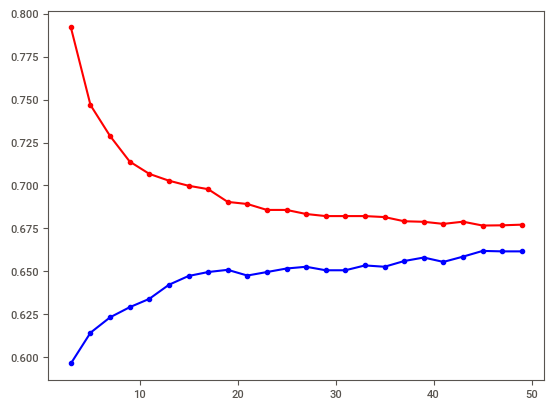

In [106]:
# Plotting the data accuracies
plt.plot(np.arange(3, 50, 2), [i[2] for i in acc], "ro-")
plt.plot(np.arange(3, 50, 2), [i[3] for i in acc], "bo-")

# Use Under sampling to reduce the number of instances in the majority class

In [107]:
counts = np.bincount(Y_train)
counts

array([5807, 9821], dtype=int64)

In [69]:
rus = RandomUnderSampler()

# Apply RandomUnderSampler to the training data
X_retrain, Y_retrain = rus.fit_resample(X_train, Y_train)

In [70]:
X_retrain.shape, Y_retrain.shape

((10678, 19), (10678, 1))

In [111]:
acr = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_retrain, Y_retrain)
    train_acc = np.mean(neigh.predict(X_retrain) == Y_retrain)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    diff = train_acc - test_acc
    acr.append([i,diff, train_acc, test_acc])
    
acr

[[3, 0.2064906131444495, 0.7782848286550714, 0.5717942155106219],
 [5, 0.1486494217701213, 0.731961425865335, 0.5833120040952137],
 [7, 0.11640325002493612, 0.7043223695539865, 0.5879191195290504],
 [9, 0.10130571961352697, 0.6953676597210263, 0.5940619401074994],
 [11, 0.09246069356026854, 0.6890821422421216, 0.5966214486818531],
 [13, 0.07710249613131626, 0.6796108145341829, 0.6025083184028667],
 [15, 0.07273482499453787, 0.6778026519717583, 0.6050678269772204],
 [17, 0.07065656309435464, 0.6744446357843982, 0.6037880726900435],
 [19, 0.0605553635544579, 0.6707422076803857, 0.6101868441259278],
 [21, 0.055919951159974834, 0.6676425004305149, 0.61172254927054],
 [23, 0.04164215108205682, 0.6643705872223179, 0.6227284361402611],
 [25, 0.04445996859389978, 0.6646288961598071, 0.6201689275659074],
 [27, 0.04700768676798417, 0.663337351472361, 0.6163296647043768],
 [29, 0.04760804954207187, 0.6636817633890133, 0.6160737138469414],
 [31, 0.04675409399060271, 0.6635956604098502, 0.616841566

In [112]:
knn = KNeighborsClassifier()

In [113]:
k_range = list(range(3, 50, 2))
param_grid = dict(n_neighbors = k_range)

In [114]:
grid = GridSearchCV(knn, param_grid, cv = 5, 
                    scoring = 'accuracy', 
                    return_train_score = False, verbose = 1)

In [115]:
knn_fit = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [116]:
print(knn_fit.best_params_)

{'n_neighbors': 49}


In [117]:
accuracy_train = knn_fit.best_score_ *100
accuracy_train

65.60656583493282

In [118]:
# Predict the class on test data
pred = knn_fit.predict(X_test)

In [119]:
accuracy_test = accuracy_score(Y_test,pred)
print("Test_Accuracy:", accuracy_test*100,"%")

Test_Accuracy: 66.16329664704377 %


In [120]:
cm = skmet.confusion_matrix(Y_test, pred)
cm

array([[ 487,  924],
       [ 398, 2098]], dtype=int64)

[Text(0.5, 1.0, 'Vehicle Failure Detection - Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

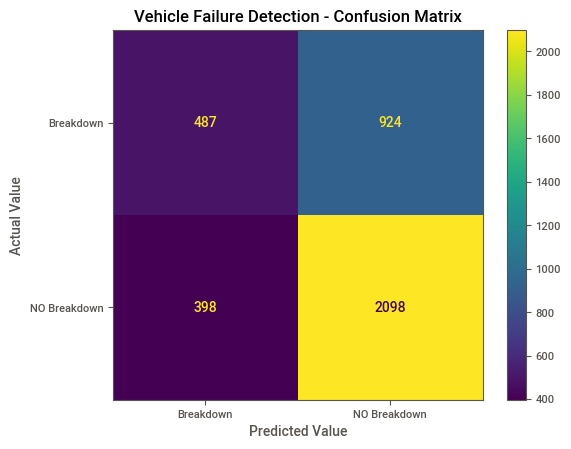

In [121]:
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Breakdown', 'NO Breakdown'])
cmplot.plot()
cmplot.ax_.set(title = 'Vehicle Failure Detection - Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [122]:
knn_best = knn_fit.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=49)

In [123]:
# Save the model
pickle.dump(knn_best, open('knn_best.pkl', 'wb'))

# LazyClassifier

In [72]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [73]:
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [12:09<00:20, 20.32s/it]

[LightGBM] [Info] Number of positive: 5339, number of negative: 18661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222458 -> initscore=-1.251397
[LightGBM] [Info] Start training from score -1.251397


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [12:10<00:00, 25.18s/it]


In [74]:
sorted_models = models.sort_values(by='Accuracy', ascending=False)
sorted_models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.82               0.65     0.65      0.80   
LGBMClassifier                     0.82               0.65     0.65      0.79   
LogisticRegression                 0.81               0.60     0.60      0.77   
CalibratedClassifierCV             0.81               0.60     0.60      0.77   
LinearDiscriminantAnalysis         0.81               0.60     0.60      0.77   
XGBClassifier                      0.81               0.64     0.64      0.79   
RandomForestClassifier             0.81               0.63     0.63      0.79   
ExtraTreesClassifier               0.81               0.63     0.63      0.78   
AdaBoostClassifier                 0.81               0.62     0.62      0.78   
BaggingClassifier                  0.80               0.63     0.63      0.78   
LinearSVC                          0.80               0.56     0.56      0.75   
RidgeClassifier                    0.80               0.55     0.55      0.73   
RidgeClassifierCV                  0.80               0.55     0.55      0.73   
SGDClassifier                      0.80               0.55     0.55      0.73   
GaussianNB                         0.79               0.61     0.61      0.77   
KNeighborsClassifier               0.79               0.63     0.63      0.77   
BernoulliNB                        0.79               0.51     0.51      0.70   
DummyClassifier                    0.78               0.50     0.50      0.69   
QuadraticDiscriminantAnalysis      0.75               0.67     0.67      0.76   
LabelSpreading                     0.74               0.61     0.61      0.74   
LabelPropagation                   0.74               0.61     0.61      0.74   
PassiveAggressiveClassifier        0.72               0.57     0.57      0.71   
DecisionTreeClassifier             0.72               0.60     0.60      0.72   
ExtraTreeClassifier                0.71               0.59     0.59      0.72   
Perceptron                         0.71               0.61     0.61      0.72   
NearestCentroid                    0.66               0.66     0.66      0.69   

                               Time Taken  
Model                                      
SVC                                109.36  
LGBMClassifier                       0.96  
LogisticRegression                   0.23  
CalibratedClassifierCV               0.53  
LinearDiscriminantAnalysis           0.38  
XGBClassifier                        3.08  
RandomForestClassifier              25.76  
ExtraTreesClassifier                 5.73  
AdaBoostClassifier                   7.13  
BaggingClassifier                   12.62  
LinearSVC                            7.73  
RidgeClassifier                      0.18  
RidgeClassifierCV                    0.19  
SGDClassifier                        0.36  
GaussianNB                           0.16  
KNeighborsClassifier                 1.50  
BernoulliNB                          0.15  
DummyClassifier                      0.11  
QuadraticDiscriminantAnalysis        0.16  
LabelSpreading                     338.67  
LabelPropagation                   212.27  
PassiveAggressiveClassifier          0.20  
DecisionTreeClassifier               1.95  
ExtraTreeClassifier                  0.17  
Perceptron                           0.17  
NearestCentroid                      0.28

In [75]:
modelsss, predictionsss = clf.fit(X_retrain, X_test, Y_retrain, Y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [02:01<00:04,  4.18s/it]

[LightGBM] [Info] Number of positive: 5339, number of negative: 5339
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 10678, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:01<00:00,  4.20s/it]


In [76]:
sorted_modelsss = modelsss.sort_values(by='Accuracy', ascending=False)
sorted_modelsss

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.78               0.50     0.50      0.69   
SVC                                0.76               0.71     0.71      0.77   
LGBMClassifier                     0.74               0.70     0.70      0.76   
RandomForestClassifier             0.74               0.70     0.70      0.75   
AdaBoostClassifier                 0.74               0.70     0.70      0.75   
ExtraTreesClassifier               0.73               0.69     0.69      0.75   
NuSVC                              0.72               0.69     0.69      0.74   
BaggingClassifier                  0.72               0.67     0.67      0.73   
XGBClassifier                      0.71               0.69     0.69      0.73   
GaussianNB                         0.69               0.67     0.67      0.71   
KNeighborsClassifier               0.67               0.66     0.66      0.69   
NearestCentroid                    0.66               0.65     0.65      0.69   
CalibratedClassifierCV             0.65               0.65     0.65      0.68   
LogisticRegression                 0.65               0.65     0.65      0.68   
LinearDiscriminantAnalysis         0.64               0.65     0.65      0.67   
RidgeClassifier                    0.64               0.65     0.65      0.67   
RidgeClassifierCV                  0.64               0.65     0.65      0.67   
QuadraticDiscriminantAnalysis      0.64               0.66     0.66      0.67   
LinearSVC                          0.64               0.65     0.65      0.67   
BernoulliNB                        0.64               0.65     0.65      0.67   
SGDClassifier                      0.63               0.64     0.64      0.66   
LabelPropagation                   0.62               0.63     0.63      0.65   
LabelSpreading                     0.62               0.63     0.63      0.65   
DecisionTreeClassifier             0.61               0.62     0.62      0.65   
ExtraTreeClassifier                0.59               0.59     0.59      0.63   
Perceptron                         0.53               0.53     0.53      0.57   
PassiveAggressiveClassifier        0.50               0.46     0.46      0.54   

                               Time Taken  
Model                                      
DummyClassifier                      0.08  
SVC                                 20.16  
LGBMClassifier                       0.52  
RandomForestClassifier               9.30  
AdaBoostClassifier                   3.28  
ExtraTreesClassifier                 3.09  
NuSVC                               26.61  
BaggingClassifier                    4.33  
XGBClassifier                        0.85  
GaussianNB                           0.10  
KNeighborsClassifier                 0.66  
NearestCentroid                      0.14  
CalibratedClassifierCV               0.26  
LogisticRegression                   0.10  
LinearDiscriminantAnalysis           0.26  
RidgeClassifier                      0.11  
RidgeClassifierCV                    0.11  
QuadraticDiscriminantAnalysis        0.10  
LinearSVC                            2.46  
BernoulliNB                          0.10  
SGDClassifier                        0.18  
LabelPropagation                    20.86  
LabelSpreading                      26.96  
DecisionTreeClassifier               0.72  
ExtraTreeClassifier                  0.10  
Perceptron                           0.11  
PassiveAggressiveClassifier          0.12

# SECOND MODEL ( NAIVE BAYES )

In [129]:
model = GaussianNB()
nb_model = model.fit(X_train, Y_train)

In [130]:
### For Train Dataset ###
predictionss = pd.DataFrame(nb_model.predict(X_train))

In [131]:
train_accuracy = skmet.accuracy_score(Y_train, predictionss)
print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.6591374456104427


In [132]:
  # Classification report
classification_report = skmet.classification_report(Y_train, predictionss)
print(classification_report)

              precision    recall  f1-score   support

           0       0.57      0.33      0.42      5807
           1       0.68      0.85      0.76      9821

    accuracy                           0.66     15628
   macro avg       0.63      0.59      0.59     15628
weighted avg       0.64      0.66      0.63     15628



In [133]:
confusion_matrix = skmet.confusion_matrix(Y_train, predictionss)
print(confusion_matrix)

[[1914 3893]
 [1434 8387]]


In [134]:
### For Test Dataset ###
predictions_test = pd.DataFrame(nb_model.predict(X_test))

In [135]:
# Evaluating the model
test_accuracy = skmet.accuracy_score(Y_test, predictions_test)
print('Test_Accuracy:', test_accuracy)

Test_Accuracy: 0.668031737906322


In [136]:
classification_report = skmet.classification_report(Y_test, predictions_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.57      0.35      0.43      1411
           1       0.70      0.85      0.77      2496

    accuracy                           0.67      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.65      0.67      0.64      3907



In [137]:
# Confusion matrix
confusion_matrix = skmet.confusion_matrix(Y_test, predictions_test)
print(confusion_matrix)

[[ 487  924]
 [ 373 2123]]


# Hyper Parameter Tuning

In [138]:
param_grid = {'priors': [[0.63, 0.37]]}
model = GaussianNB()

In [139]:
# Create the GridSearchCV object
grid_search = GridSearchCV(model,param_grid, scoring='accuracy', cv=5, error_score='raise')

In [140]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise', estimator=GaussianNB(),
             param_grid={'priors': [[0.63, 0.37]]}, scoring='accuracy')

In [141]:
best_score = grid_search.best_score_
print("Best Score:", best_score)

Best Score: 0.5419118515674984


In [142]:
best_estimat = grid_search.best_estimator_

In [143]:
predict = pd.DataFrame(best_estimat.predict(X_train))

In [144]:
accuracy_train = skmet.accuracy_score(Y_train, predict)
print('Accuracy_train:', accuracy_train)

Accuracy_train: 0.5424238546199129


In [145]:
### For Test Dataset ###
predictions_test = pd.DataFrame(best_estimat.predict(X_test))

In [146]:
# Evaluating the model
accuracy_test = skmet.accuracy_score(Y_test, predictions_test)
print('Accuracy_test:', accuracy_test)

Accuracy_test: 0.5400563091886358


In [147]:
classification_report = skmet.classification_report(Y_test, predictions_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.43      0.88      0.58      1411
           1       0.84      0.35      0.49      2496

    accuracy                           0.54      3907
   macro avg       0.64      0.61      0.54      3907
weighted avg       0.69      0.54      0.52      3907



In [148]:
# Save the Stacking model 
pickle.dump(best_estimat, open('nb_model.pkl', 'wb'))

# THIRD MODEL ( "DecisionTreeClassifier" )

In [149]:
model = DT(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [150]:
# Prediction on Train Data
preds = model.predict(X_train)

In [151]:
pd.crosstab(Y_train, preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions     0     1
Actual                 
0            5807     0
1               0  9821

In [152]:
accuracy_score(Y_train, preds)

1.0

In [153]:
# Prediction on Test Data
predss = model.predict(X_test)

In [154]:
pd.crosstab(Y_test, predss, rownames=['Actual'], colnames=['Predictions'])

Predictions    0     1
Actual                
0            596   815
1            862  1634

In [155]:
accuracy_score(Y_test, predss)

0.5707704120808804

#Test data accuracy is 0.59 and train data accuracy is 1 so the model is ( overfitting )

# HYPER PARAMETER TUNING

In [156]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_model = DT()

In [157]:
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 3, scoring = 'accuracy', return_train_score = False, verbose = 1)

In [158]:
d_tree = dtree_gscv.fit(X_train, Y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [159]:
s_param = dtree_gscv.best_params_
print("set_param:", s_param)

set_param: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [160]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_
print("best_param:", DT_best)

best_param: DecisionTreeClassifier(max_depth=3)


In [161]:
pred_test = DT_best.predict(X_test)
pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [162]:
pd.crosstab(Y_test, pred_test, rownames = ['Actual'], colnames= ['Predictions'])

Predictions    0     1
Actual                
0            415   996
1            408  2088

In [163]:
# Accuracy
print(accuracy_score(Y_test, pred_test))

0.6406449961607371


In [164]:
classification_report = skmet.classification_report(Y_test, pred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.50      0.29      0.37      1411
           1       0.68      0.84      0.75      2496

    accuracy                           0.64      3907
   macro avg       0.59      0.57      0.56      3907
weighted avg       0.61      0.64      0.61      3907



In [165]:
# Save the Stacking model 
pickle.dump(DT_best, open('d_tree.pkl', 'wb'))

# FORTH MODEL ( "LOGISTIC REGRESSION" )

In [166]:
# Building the model and fitting the data
logit_model = sm.Logit(y, pca).fit()

Optimization terminated successfully.
         Current function value: 0.644029
         Iterations 5


In [167]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit             Method:           MLE        
Dependent Variable: Vehicle_condition Pseudo R-squared: 0.022      
Date:               2024-03-17 12:15  AIC:              25172.2197 
No. Observations:   19535             BIC:              25211.6196 
Df Model:           4                 Log-Likelihood:   -12581.    
Df Residuals:       19530             LL-Null:          -12867.    
Converged:          1.0000            LLR p-value:      1.3403e-122
No. Iterations:     5.0000            Scale:            1.0000     
----------------------------------------------------------------------
        Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
PC1     0.2704      0.0145     18.6014    0.0000     0.2419     0.2989
PC2    -0.3825      0.0150    -25.5102    0.0000    -0.4118    -0.3531
PC3    -0.2967      0.0151    -19.6776    0.0000    -0.3262    -0.2671
PC4     0.0409      0.0155      2.6374    0.0084     0.0105     0.0712
PC5     0.3625      0.0162     22.4388    0.0000     0.3308     0.3942
===================================================================

"""

In [168]:
# Prediction
pred = logit_model.predict(pca)
pred  # Probabilities

0       0.60
1       0.52
2       0.69
3       0.81
4       0.73
        ... 
19530   0.35
19531   0.68
19532   0.46
19533   0.62
19534   0.62
Length: 19535, dtype: float64

In [169]:
# ROC Curve to identify the appropriate cutoff value
fpr, tpr, thresholds = roc_curve(y, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.514865071084608

In [170]:
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.689892


In [171]:
# Filling all the cells with zeroes
pca["pred"] = np.zeros(19535)
pca

PC1   PC2   PC3   PC4   PC5  pred
0     -0.02 -1.71  1.05 -1.28  0.35  0.00
1      0.25 -0.65  1.39 -1.32  0.59  0.00
2     -0.06  0.33 -1.52 -0.54  1.41  0.00
3      1.84 -2.55 -0.02 -0.06 -0.07  0.00
4      1.05 -0.59  1.28  0.24  2.38  0.00
...     ...   ...   ...   ...   ...   ...
19530 -1.04 -0.40  1.93  1.56  0.02  0.00
19531  2.06 -1.64  1.45  0.56 -0.02  0.00
19532 -1.55  0.15 -0.16  0.06  0.75  0.00
19533  1.03  0.52 -0.94 -1.13  0.46  0.00
19534 -0.53 -0.15 -1.05  1.44  0.61  0.00

[19535 rows x 6 columns]

In [172]:
pca.loc[pred > optimal_threshold, "pred"] = 1
pca

PC1   PC2   PC3   PC4   PC5  pred
0     -0.02 -1.71  1.05 -1.28  0.35  1.00
1      0.25 -0.65  1.39 -1.32  0.59  1.00
2     -0.06  0.33 -1.52 -0.54  1.41  1.00
3      1.84 -2.55 -0.02 -0.06 -0.07  1.00
4      1.05 -0.59  1.28  0.24  2.38  1.00
...     ...   ...   ...   ...   ...   ...
19530 -1.04 -0.40  1.93  1.56  0.02  0.00
19531  2.06 -1.64  1.45  0.56 -0.02  1.00
19532 -1.55  0.15 -0.16  0.06  0.75  0.00
19533  1.03  0.52 -0.94 -1.13  0.46  1.00
19534 -0.53 -0.15 -1.05  1.44  0.61  1.00

[19535 rows x 6 columns]

In [175]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(pca.pred, y.Vehicle_condition))

Test accuracy =  0.6243665216278474


In [178]:
# Classification report
classification = classification_report(pca["pred"],y)
print(classification)

              precision    recall  f1-score   support

         0.0       0.71      0.49      0.58     10372
         1.0       0.57      0.77      0.66      9163

    accuracy                           0.62     19535
   macro avg       0.64      0.63      0.62     19535
weighted avg       0.65      0.62      0.62     19535



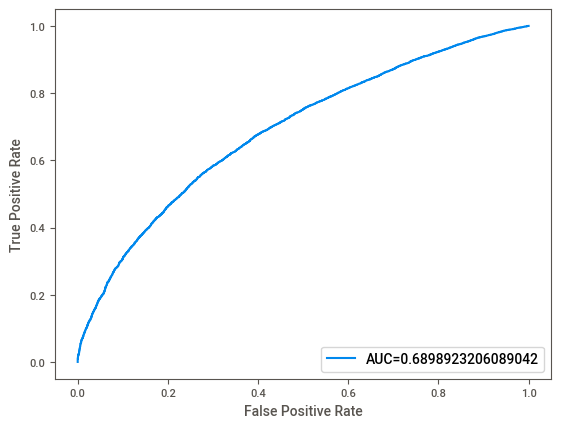

In [179]:
### PLOT FOR ROC
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

# Model evaluation
# Fitting Logistic Regression to the training set  

In [186]:
y =pd.DataFrame(final_data['Vehicle_condition']) # Target
y

Vehicle_condition
0                      1
1                      0
2                      1
3                      1
4                      0
...                  ...
19530                  1
19531                  1
19532                  1
19533                  1
19534                  1

[19535 rows x 1 columns]

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size = 0.2, random_state = 0)

In [188]:
logisticmodel = sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.614749
         Iterations 5


In [189]:
logisticmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Vehicle_condition   No. Observations:                15628
Model:                          Logit   Df Residuals:                    15622
Method:                           MLE   Df Model:                            5
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                 0.06826
Time:                        12:20:44   Log-Likelihood:                -9607.3
converged:                       True   LL-Null:                       -10311.
Covariance Type:            nonrobust   LLR p-value:                2.831e-302
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.1395      0.017      8.145      0.000       0.106       0.173
PC2           -0.1673      0.018     -9.138      0.000      -0.203      -0.131
PC3           -0.1070      0.018     -5.891      0.000      -0.143      -0.071
PC4            0.0125      0.018      0.697      0.486      -0.023       0.048
PC5            0.1653      0.019      8.489      0.000       0.127       0.203
pred           0.9567      0.033     29.050      0.000       0.892       1.021
==============================================================================
"""

In [190]:
logisticmodel.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit             Method:           MLE        
Dependent Variable: Vehicle_condition Pseudo R-squared: 0.068      
Date:               2024-03-17 12:21  AIC:              19226.5952 
No. Observations:   15628             BIC:              19272.5361 
Df Model:           5                 Log-Likelihood:   -9607.3    
Df Residuals:       15622             LL-Null:          -10311.    
Converged:          1.0000            LLR p-value:      2.8314e-302
No. Iterations:     5.0000            Scale:            1.0000     
----------------------------------------------------------------------
         Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
----------------------------------------------------------------------
PC1      0.1395      0.0171     8.1447    0.0000     0.1060     0.1731
PC2     -0.1673      0.0183    -9.1383    0.0000    -0.2032    -0.1314
PC3     -0.1070      0.0182    -5.8906    0.0000    -0.1425    -0.0714
PC4      0.0125      0.0180     0.6966    0.4860    -0.0227     0.0477
PC5      0.1653      0.0195     8.4894    0.0000     0.1271     0.2034
pred     0.9567      0.0329    29.0502    0.0000     0.8922     1.0212
===================================================================

"""

In [191]:
y_pred_train = logisticmodel.predict(X_train) 
y_pred_train

4800    0.35
10422   0.44
14054   0.73
5782    0.51
3928    0.41
        ... 
9225    0.75
13123   0.72
9845    0.80
10799   0.80
2732    0.34
Length: 15628, dtype: float64

In [192]:
# Filling all the cells with zeroes
Y_train["pred"] = np.zeros(15628)
Y_train

Vehicle_condition  pred
4800                   0  0.00
10422                  0  0.00
14054                  1  0.00
5782                   0  0.00
3928                   1  0.00
...                  ...   ...
9225                   1  0.00
13123                  0  0.00
9845                   1  0.00
10799                  1  0.00
2732                   0  0.00

[15628 rows x 2 columns]

In [193]:
Y_train.loc[pred > optimal_threshold, "pred"] = 1
Y_train

Vehicle_condition  pred
4800                   0  0.00
10422                  0  0.00
14054                  1  1.00
5782                   0  0.00
3928                   1  0.00
...                  ...   ...
9225                   1  1.00
13123                  0  1.00
9845                   1  1.00
10799                  1  1.00
2732                   0  0.00

[15628 rows x 2 columns]

In [194]:
auc = metrics.roc_auc_score(Y_train["Vehicle_condition"], y_pred_train)
print("Area under the ROC curve in % : " ,auc)

Area under the ROC curve in % :  0.6890733487090699


In [195]:
classification_train = classification_report(Y_train["pred"], Y_train["Vehicle_condition"])
print(classification_train)

              precision    recall  f1-score   support

         0.0       0.71      0.50      0.58      8282
         1.0       0.58      0.77      0.66      7346

    accuracy                           0.62     15628
   macro avg       0.64      0.63      0.62     15628
weighted avg       0.65      0.62      0.62     15628



In [196]:
# confusion matrix 
confusion_matrix(Y_train["pred"], Y_train["Vehicle_condition"])

array([[4113, 4169],
       [1694, 5652]], dtype=int64)

In [197]:
# Accuracy score of the model
print('Train accuracy = ', accuracy_score(Y_train["pred"], Y_train["Vehicle_condition"]))

Train accuracy =  0.6248400307141029


In [198]:
# Validate on Test data
y_pred_test = logisticmodel.predict(X_test)  
y_pred_test

10296   0.83
19243   0.41
8888    0.41
13299   0.73
5966    0.82
        ... 
1359    0.75
3141    0.49
1088    0.44
17718   0.75
17026   0.75
Length: 3907, dtype: float64

In [199]:
# Filling all the cells with zeroes
Y_test["y_pred_test"] = np.zeros(3907)

In [200]:
# Capturing the prediction binary values
Y_test.loc[y_pred_test > optimal_threshold, "y_pred_test"] = 1
Y_test

Vehicle_condition  y_pred_test
10296                  1         1.00
19243                  0         0.00
8888                   0         0.00
13299                  1         1.00
5966                   1         1.00
...                  ...          ...
1359                   1         1.00
3141                   1         0.00
1088                   1         0.00
17718                  1         1.00
17026                  1         1.00

[3907 rows x 2 columns]

In [201]:
# classification report
classification1 = classification_report(Y_test["y_pred_test"], Y_test["Vehicle_condition"])
print(classification1)

              precision    recall  f1-score   support

         0.0       0.72      0.49      0.58      2082
         1.0       0.57      0.78      0.66      1825

    accuracy                           0.62      3907
   macro avg       0.64      0.63      0.62      3907
weighted avg       0.65      0.62      0.62      3907



In [202]:
# confusion matrix 
confusion_matrix(Y_test["y_pred_test"], Y_test["Vehicle_condition"])

array([[1010, 1072],
       [ 401, 1424]], dtype=int64)

In [203]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test["y_pred_test"], Y_test["Vehicle_condition"]))

Test accuracy =  0.6229843869976964


2024-03-17 12:22:07,703 - INFO     - Executing shutdown due to inactivity...
2024-03-17 12:22:11,924 - INFO     - Executing shutdown...
2024-03-17 12:22:11,932 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [204]:
# Save the model
pickle.dump(logisticmodel, open('logistic.pkl', 'wb'))

# FIFTH MODEL ( "ENSEMBLE MODEL" )


In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size = 0.2, random_state = 0)

In [206]:
# Base estimators
estimator = [('rf', RandomForestClassifier(n_estimators = 10, random_state = 42)),
              ("svrbf",SVC(kernel='rbf', random_state=42)),
              ('svr',(LinearSVC(random_state = 42)))]


In [207]:
# Meta Model stacked on top of base estimators

clf = StackingClassifier(estimators = estimator, final_estimator = LogisticRegression())

In [208]:
# Fit the model on traing data
stacking = clf.fit(X_train, Y_train)

In [209]:
# Obtain predictions on the training set
train_predictions = stacking.predict(X_train)

In [211]:
# Calculate training accuracy score
training_accuracy = accuracy_score(Y_train, train_predictions)
training_accuracy

0.6865881750703865

In [212]:
# Accuracy on Test data
test_accuracy= stacking.score(X_test, Y_test)
test_accuracy

0.6677757870488866

In [213]:
# Save the Stacking model 
pickle.dump(stacking, open('stacking.pkl', 'wb'))

# Sixth MODEL ( "ENSEMBLE MODEL STACKING" )

In [443]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size = 0.2, random_state = 0)

PC1   PC2   PC3   PC4   PC5
10296  1.27 -0.80 -0.05 -0.52  1.82
19243  0.47  0.76 -0.11 -0.24 -2.00
8888  -0.09  0.79  1.75  0.16 -0.29
13299 -0.74 -0.85 -0.72  1.12 -0.53
5966   1.06 -0.14 -1.06  0.58  1.75
...     ...   ...   ...   ...   ...
1359   0.53  0.93 -0.71  1.20  0.68
3141  -0.34 -0.06  1.82 -1.59  1.18
1088  -1.49 -0.06  0.20 -0.72 -0.10
17718 -0.01  0.10 -0.77 -0.51  0.42
17026 -0.56  0.21  0.41  1.22  1.56

[3907 rows x 5 columns]

In [434]:
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, min_samples_split=5, random_state=42)),
    ('gb', GradientBoostingClassifier(min_samples_split=5, learning_rate=0.1, random_state=42)),
    ('svm_rbf', SVC(kernel='rbf', C=1.0, random_state=42)),
    ('svm_linear', LinearSVC(C=1.0, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

In [435]:
# Define meta model stacked on top of base estimators
meta_model = LogisticRegression()

In [436]:
clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

In [437]:
# Fit the model on training data
stacking = clf.fit(X_train, Y_train)

In [438]:
# Obtain predictions on the training set
train_predictions = stacking.predict(X_train)

In [439]:
# Calculate training accuracy score
training_accuracy = accuracy_score(Y_train, train_predictions)
training_accuracy

0.6727668287688764

In [440]:
# You can also obtain predictions on the test set
test_predictions = stacking.predict(X_test)

In [441]:
# Calculate testing accuracy score
test_accuracy = accuracy_score(Y_test, test_predictions)
test_accuracy

0.6670079344765805

In [442]:
# Save the Stacking model 
pickle.dump(stacking, open('stacking2.pkl', 'wb'))

# SEVENTH MODEL ( "Support Vector Classifier (SVC)" )

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size=0.2, random_state=0)

In [50]:
# Initialize the SVC model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')

In [51]:
# Train the model on the training data
model=svc_model.fit(X_train, Y_train)

In [56]:
# Make predictions on the train data
pred = model.predict(X_train)

In [57]:
# Calculate training accuracy score
training_accuracy = accuracy_score(Y_train, pred)
training_accuracy

0.8222083333333333

In [58]:
classification_report = skmet.classification_report(Y_train, pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18661
           1       0.69      0.37      0.48      5339

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000



In [59]:
cm = skmet.confusion_matrix(Y_train, pred)
cm

array([[17769,   892],
       [ 3375,  1964]], dtype=int64)

In [60]:
# Make predictions on the test data
pred_test = model.predict(X_test)

In [61]:
# Calculate testing accuracy score
testing_accuracy = accuracy_score(Y_test, pred_test)
testing_accuracy

0.8245

In [62]:
classification_report = skmet.classification_report(Y_test, pred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.67      0.36      0.47      1297

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [63]:
cm = skmet.confusion_matrix(Y_test, pred_test)
cm

array([[4474,  229],
       [ 824,  473]], dtype=int64)

In [64]:
# Save the Stacking model 
pickle.dump(model, open('svc.pkl', 'wb'))

# Hyper parameter Tuning

In [62]:
# Initialize the SVC model
svc_model = SVC()

In [63]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [64]:
# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
model=grid_search.fit(X_train, Y_train)

In [478]:
# Get the best hyperparameters
best_params = model.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'gamma': 0.1}


In [482]:
best_model = model.best_estimator_
best_model

SVC(C=100, gamma=0.1)

In [483]:
y_pred = best_model.predict(X_test)

In [484]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6682876887637573


In [485]:
classification_report = skmet.classification_report(Y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.58      0.30      0.39      1411
           1       0.69      0.88      0.77      2496

    accuracy                           0.67      3907
   macro avg       0.63      0.59      0.58      3907
weighted avg       0.65      0.67      0.63      3907



In [486]:
cm = skmet.confusion_matrix(Y_test, y_pred)
cm

array([[ 417,  994],
       [ 302, 2194]], dtype=int64)

[Text(0.5, 1.0, 'Vehicle Failure Detection - Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

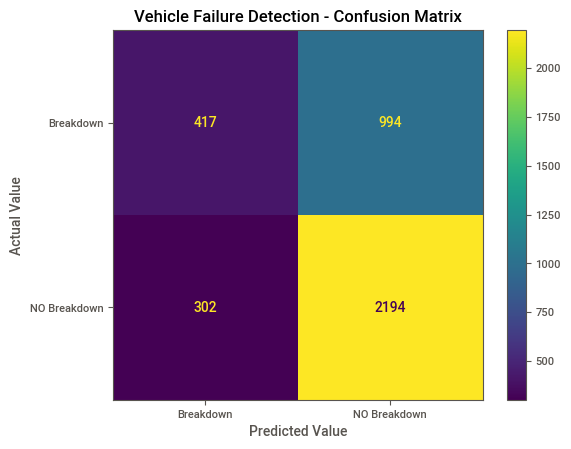

In [487]:
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Breakdown', 'NO Breakdown'])
cmplot.plot()
cmplot.ax_.set(title = 'Vehicle Failure Detection - Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [472]:
# Save the Stacking model 
pickle.dump(model, open('svc.pkl', 'wb'))

# 8TH MODEL ( "ENSEMBLE MODEL STACKING WITH 2 LAYER" )

In [269]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size=0.2, random_state=0)

In [270]:
base_estimators_layer1 = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svm_rbf', SVC(kernel='rbf', random_state=42)),
    ('svm_linear', LinearSVC(random_state=42))
]

In [271]:
# Define stacking classifier for the first layer
clf_layer1 = StackingClassifier(estimators=base_estimators_layer1, final_estimator=LogisticRegression())

In [272]:
# Fit the model on training data for the first layer
stacking_layer1 = clf_layer1.fit(X_train, Y_train)

In [273]:
# Obtain predictions on the training set for the first layer
train_predictions_layer1 = stacking_layer1.predict(X_train)
train_predictions_layer1

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [274]:
# Calculate training accuracy score
training_accuracy = accuracy_score(Y_train, train_predictions_layer1)
training_accuracy

0.6822370104939851

In [275]:
# Define base estimators for the second layer
base_estimators_layer2 = [
    ('knn', KNeighborsClassifier()),
    ('mlp', MLPClassifier(random_state=42))
]

In [276]:
# Define stacking classifier for the second layer
clf_layer2 = StackingClassifier(estimators=base_estimators_layer2, final_estimator=LogisticRegression())

In [277]:
train_predictions_layer1 = pd.DataFrame(train_predictions_layer1)
train_predictions_layer1

0
0      0
1      0
2      1
3      1
4      0
...   ..
15623  1
15624  1
15625  1
15626  1
15627  0

[15628 rows x 1 columns]

In [278]:
# Fit the model on predictions from the first layer for the second layer
stacking_layer2 = clf_layer2.fit(train_predictions_layer1, Y_train)

In [280]:
# Obtain predictions on the test set using the first layer
test_predictions_layer1 = stacking_layer1.predict(X_test)
test_predictions_layer1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [282]:
test_predictions_layer1 = pd.DataFrame(test_predictions_layer1)
test_predictions_layer1

0
0     1
1     0
2     0
3     1
4     1
...  ..
3902  1
3903  1
3904  1
3905  1
3906  1

[3907 rows x 1 columns]

In [284]:
# Obtain predictions on the test set using the second layer
test_predictions_layer2 = stacking_layer2.predict(test_predictions_layer1)
test_predictions_layer2

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [286]:
# Calculate testing accuracy score
test_accuracy = accuracy_score(Y_test, test_predictions_layer2)
test_accuracy

0.6695674430509342

In [287]:
# Save the Stacking model 
pickle.dump(stacking_layer1, open('stacking_layer1.pkl', 'wb'))
pickle.dump(stacking_layer2, open('stacking_layer2.pkl', 'wb'))

# 9TH  MODEL ( "ENSEMBLE (Voting Classifier) " )

In [328]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size=0.2, random_state=0)

In [329]:
### k-Nearest Neighbors (k-NN) with GridSearchCV
knn = neighbors.KNeighborsClassifier()

In [330]:
params_knn = {'n_neighbors': np.arange(1, 25)}

In [331]:
knn_gs = GridSearchCV(knn, params_knn, cv = 5)

In [332]:
knn_gs.fit(X_train, Y_train)
knn_best = knn_gs.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=23)

In [333]:
### Random Forest Classifier with GridSearchCV
rf = ensemble.RandomForestClassifier(random_state = 0)

In [338]:
params_rf = {'n_estimators': [50, 100, 200, 250, 300], 'min_samples_split': [2, 5, 10]}

In [339]:
rf_gs = GridSearchCV(rf, params_rf, cv = 5)

In [340]:
rf_gs.fit(X_train, Y_train)
rf_best = rf_gs.best_estimator_
rf_best

RandomForestClassifier(n_estimators=200, random_state=0)

In [341]:
### Logistic Regression with GridSearchCV
log_reg = linear_model.LogisticRegression()

In [342]:
C = np.arange(1, 21)
params_lr = dict(C = C)

In [343]:
lr_gs = GridSearchCV(log_reg, params_lr, cv = 5)

In [344]:
lr_gs.fit(X_train, Y_train)
lr_best = lr_gs.best_estimator_
lr_best

LogisticRegression(C=2)

In [345]:
# Combine all three Voting Ensembles
estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

In [346]:
# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")

In [347]:
# Fit classifier with the training data
hard_voting = ensemble_H.fit(X_train, Y_train)

In [348]:
# Obtain predictions on the training set
train_pred = hard_voting.predict(X_train)

In [349]:
# Calculate training accuracy score
train_accuracy = accuracy_score(Y_train, train_pred)
train_accuracy

0.7604939851548502

In [350]:
# Obtain predictions on the testing set
test_pred = hard_voting.predict(X_test)

In [351]:
# Calculate testing accuracy score
test_accuracy = accuracy_score(Y_test, test_pred)
test_accuracy

0.6603532121832608

In [354]:
ensemble_S = VotingClassifier(estimators, voting = "soft")

In [355]:
# Fit classifier with the training data
soft_voting = ensemble_S.fit(X_train, Y_train)

In [356]:
# Obtain predictions on the training set
train_pred = soft_voting.predict(X_train)

In [357]:
# Calculate training accuracy score
train_accuracy = accuracy_score(Y_train, train_pred)
train_accuracy

0.8761837727156386

In [358]:
# Obtain predictions on the testing set
test_pred = soft_voting.predict(X_test)

In [359]:
# Calculate testing accuracy score
test_accuracy = accuracy_score(Y_test, test_pred)
test_accuracy

0.6606091630406962

In [497]:
# Save the Stacking model 
pickle.dump(hard_voting, open('hard_voting.pkl', 'wb'))

# 10TH MODEL ( "Support Vector Classifier (SVC)" )

In [498]:
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size=0.2, random_state=0)

In [499]:
# Initialize the SVC model
svc_model = SVC(kernel='linear', C=1.0, gamma='scale')

In [500]:
# Train the model on the training data
model=svc_model.fit(X_train, Y_train)

In [503]:
# Make predictions on the train data
pred_train = model.predict(X_train)

In [504]:
# Calculate training accuracy score
training_accuracy = accuracy_score(Y_train, pred_train)
training_accuracy

0.6583056053237778

In [509]:
# Make predictions on the test data
pred_test = model.predict(X_test)

In [510]:
# Calculate test accuracy score
test_accuracy = accuracy_score(Y_test, pred_test)
test_accuracy

0.6741745584847709

In [511]:
classification_report = skmet.classification_report(Y_test, pred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.60      0.30      0.40      1411
           1       0.69      0.89      0.78      2496

    accuracy                           0.67      3907
   macro avg       0.64      0.59      0.59      3907
weighted avg       0.66      0.67      0.64      3907



In [512]:
cm = skmet.confusion_matrix(Y_test, pred_test)
cm

array([[ 422,  989],
       [ 284, 2212]], dtype=int64)

# AUTO ML MODELS

# 1st MODEL ( " TPOT Classifier ")

In [367]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size=0.2, random_state=7)

In [368]:
# Define TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

In [370]:
# Fit TPOT classifier to training data
tpot.fit(X_train, Y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.661376573256558

Generation 2 - Current best internal CV score: 0.661376573256558

Generation 3 - Current best internal CV score: 0.661376573256558

Generation 4 - Current best internal CV score: 0.661376573256558

Generation 5 - Current best internal CV score: 0.661376573256558

Best pipeline: LinearSVC(input_matrix, C=0.0001, dual=True, loss=squared_hinge, penalty=l2, tol=0.001)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [382]:
# Obtain predictions on the training set
train_pred = tpot.predict(X_train)
train_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [372]:
# Calculate training accuracy score
train_accuracy = accuracy_score(Y_train, train_pred)
train_accuracy

0.6616969541847966

In [373]:
# Obtain predictions on the testing set
test_pred = tpot.predict(X_test)


In [375]:
# Evaluate TPOT classifier
accuracy = tpot.score(X_test, Y_test)
accuracy

0.6560020476068594

In [377]:
# Get the best pipeline found by TPOT
best_pipeline = tpot.fitted_pipeline_
best_pipeline

Pipeline(steps=[('linearsvc',
                 LinearSVC(C=0.0001, dual=True, random_state=42, tol=0.001))])

In [381]:
# Make predictions using the best pipeline
final_predictions = best_pipeline.predict(X_test)
final_predictions

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [383]:
# Calculate training accuracy score
train_accuracy = accuracy_score(Y_test, final_predictions)
train_accuracy

0.6560020476068594

In [384]:
# Save the Stacking model 
pickle.dump(final_predictions, open('tpot_classifier.pkl', 'wb'))

# # 2ND MODEL ( " Fast, Lightweight AutoML ")

In [400]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(pca, y, test_size=0.2, random_state=7)

In [401]:
Y_train = np.array(Y_train['Vehicle_condition'])
Y_test = np.array(Y_test['Vehicle_condition'])

In [402]:
# Define AutoML instance
automl = AutoML()

In [403]:
# Specify the task as classification
automl_settings = {
    "time_budget": 120,  # total running time in seconds
    "metric": 'accuracy',  # primary metric for optimization
    "task": 'classification',  # task type
}

In [404]:
# Train the AutoML instance
automl.fit(X_train=X_train, y_train =Y_train, **automl_settings)

[flaml.automl.logger: 03-18 01:46:45] {1680} INFO - task = classification
[flaml.automl.logger: 03-18 01:46:45] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 03-18 01:46:45] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 03-18 01:46:45] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 03-18 01:46:45] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-18 01:46:45] {2345} INFO - Estimated sufficient time budget=2314s. Estimated necessary time budget=53s.
[flaml.automl.logger: 03-18 01:46:45] {2392} INFO -  at 0.3s,	estimator lgbm's best error=0.3705,	best estimator lgbm's best error=0.3705
[flaml.automl.logger: 03-18 01:46:45] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-18 01:46:46] {2392} INFO -  at 0.6s,	estimator lgbm's best error=0.3705,	best estimator lgbm's best error=0.3705
[flaml.automl.logger: 03-18 01:46:

2024-03-18 01:48:08,629 - INFO     - No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 03-18 01:48:09] {2392} INFO -  at 83.6s,	estimator lrl1's best error=0.3395,	best estimator lgbm's best error=0.3371
[flaml.automl.logger: 03-18 01:48:09] {2219} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 03-18 01:48:09] {2392} INFO -  at 84.1s,	estimator lgbm's best error=0.3371,	best estimator lgbm's best error=0.3371
[flaml.automl.logger: 03-18 01:48:09] {2219} INFO - iteration 105, current learner lrl1
[flaml.automl.logger: 03-18 01:48:10] {2392} INFO -  at 84.7s,	estimator lrl1's best error=0.3395,	best estimator lgbm's best error=0.3371
[flaml.automl.logger: 03-18 01:48:10] {2219} INFO - iteration 106, current learner lrl1
[flaml.automl.logger: 03-18 01:48:10] {2392} INFO -  at 85.2s,	estimator lrl1's best error=0.3394,	best estimator lgbm's best error=0.3371
[flaml.automl.logger: 03-18 01:48:10] {2219} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 03-18 01:48:11] {2392} INFO -  at 85.4s,	estimator xgboost's best e

In [411]:
# Retrieve the best model ID and its configuration
best_config = automl.best_config
best_config

{'n_estimators': 966,
 'num_leaves': 4,
 'min_child_samples': 6,
 'learning_rate': 0.07986877154923996,
 'log_max_bin': 7,
 'colsample_bytree': 0.7849101871208726,
 'reg_alpha': 0.0009765625,
 'reg_lambda': 4.0510159785007565}

In [420]:
# Predict on the test set
y_pred = automl.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [407]:
# Evaluate the accuracy
accuracy = (y_pred == Y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.6560020476068594


In [421]:
# classification report
classification1 = classification_report(y_pred, Y_test)
print(classification1)

              precision    recall  f1-score   support

           0       0.36      0.54      0.44       956
           1       0.82      0.69      0.75      2951

    accuracy                           0.66      3907
   macro avg       0.59      0.62      0.59      3907
weighted avg       0.71      0.66      0.68      3907

